<a href="https://colab.research.google.com/github/Onyimatics/cats_and_dogs_image_processing/blob/master/Image_Processing_Cat_And_Dog_Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import os
import pandas as pd
import numpy as np
from tqdm import tqdm

# If you are using TensorFlow Keras
from tensorflow.keras import models, layers, regularizers

# If you are using Keras
from keras import models, layers, regularizers

import cv2
from skimage.feature import hog

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

# libraries for data plotting
import seaborn as sns
import matplotlib.pyplot as plt

# library for evaluation
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

# libraries for ML algorithms
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Imports
import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, InputLayer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.optimizers import Adam
from keras import regularizers

from random import randint
from random import seed

RANDOM_SEED = 100

In [ ]:
# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# # unzip file
# import shutil
# shutil.unpack_archive('/content/drive/MyDrive/Colab Notebooks/BCU/Applied AI/Image Processing Assessment/Prediction Challenge - Image Processing-20250218/data.zip', '/content/drive/MyDrive/Colab Notebooks/BCU/Applied AI/Image Processing Assessment/Prediction Challenge - Image Processing-20250218/', 'zip')

In [ ]:
data_folder = '/content/drive/MyDrive/Colab Notebooks/BCU/Applied AI/Image Processing Assessment/Prediction Challenge - Image Processing-20250218/data'

In [ ]:
# load training data
df_train = pd.read_csv(os.path.join(data_folder, 'train.csv'))

# summarise the details
print(f'Number of entries: {len(df_train)}')
df_train.head()

Number of entries: 10000


id label
0   1   cat
1   2   dog
2   3   cat
3   4   cat
4   5   cat

In [ ]:
# load testing data
df_test = pd.read_csv(os.path.join(data_folder, 'test.csv'))

# summarise the details
print(f'Number of entries: {len(df_test)}')
df_test.head()

Number of entries: 1000


id
0   1
1   2
2   3
3   4
4   5

<Axes: xlabel='label', ylabel='count'>

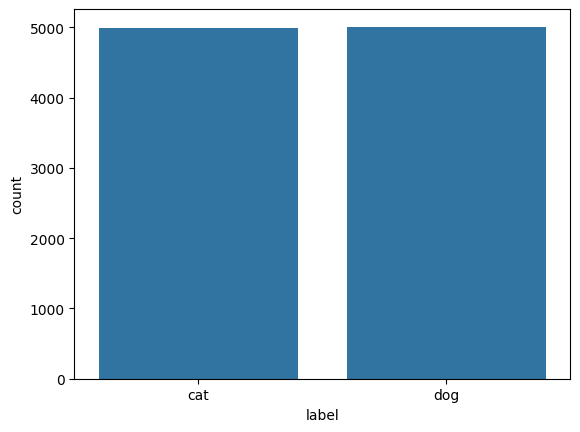

In [ ]:
# Summarise label details in training data
sns.countplot(x=df_train['label'])

In [ ]:
# method to load images in a folder
def load_images(ids, folder_path, dim=None):
  '''
  ids: list of image ids
  folder_path: path to image folder
  dim: dimensions to resize images (optional)
  '''
  images = []
  for id in tqdm(ids):
    image_path = os.path.join(folder_path, f'{id}.jpg')
    img = cv2.imread(image_path)

    # Resize if necessary
    if dim is not None:
      if img.shape[0] != dim[1] or img.shape[1] != dim[0]:
        img = cv2.resize(img, dim)
    images.append(img)
  return images

In [ ]:
base_dim = (200, 200)

# load train images
train_image_folder = os.path.join(data_folder, 'train_images')
train_images = load_images(df_train['id'], train_image_folder, base_dim)
print(f'Number of training images loaded: {len(train_images)}')

# load test images
test_image_folder = os.path.join(data_folder, 'test_images')
test_images = load_images(df_test['id'], test_image_folder, base_dim)
print(f'Number of testing images loaded: {len(test_images)}')

100%|██████████| 10000/10000 [46:01<00:00,  3.62it/s]


Number of training images loaded: 10000


100%|██████████| 1000/1000 [05:02<00:00,  3.30it/s]

Number of testing images loaded: 1000


# Image pre-processing, feature extraction and model generation

In [ ]:
# method to calculate evaluation results
def evaluate(actuals, predictions, class_names):
  '''
  actuals: list of actual labels
  predictions: list of predicted labels
  class_names: list of classes used for the model/classification task
  '''
  # calculate accuracy
  accuracy = metrics.accuracy_score(actuals, predictions)
  print(f'Accuracy: {accuracy}')

  # plot confusion matrix
  confusion_matrix = metrics.confusion_matrix(actuals, predictions, labels=class_names)
  disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=class_names)
  disp.plot()
  plt.show()

In [ ]:
# method to train and predict using SVM classifier
def get_svm_predictions(X_train, X_val, y_train, y_val):
  # build model
  clf = svm.SVC(kernel='linear', random_state=RANDOM_SEED)
  clf.fit(X_train, y_train)

  # Make predictions on test data
  y_pred = clf.predict(X_val)

  # evalution
  evaluate(y_val, y_pred, clf.classes_)

  return clf

#SVM_M1

In [ ]:
# method to get image features
def get_features_m1(images):
  '''
  images: list of images
  '''
  features_list = []
  for img in images:
    # image preprocessing - gray scaling
    img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # image vectorisation/ feature extraction
    features = img_grayscaled.flatten()

    features_list.append(features)

  features_list = np.array(features_list)
  return features_list

In [ ]:
# feature extraction
features_train = get_features_m1(train_images)
print(features_train.shape)

(10000, 40000)


In [ ]:
# data split for train and validation
X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'], test_size=0.3, random_state=RANDOM_SEED)

Accuracy: 0.516


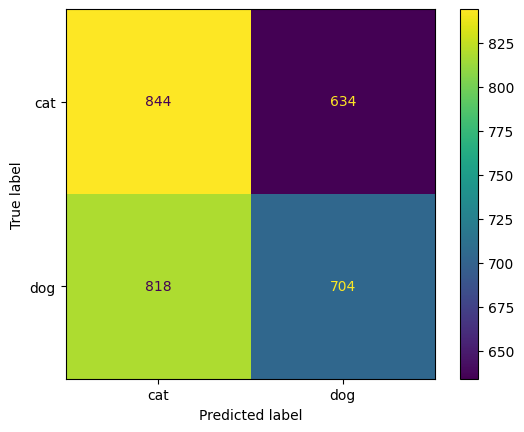

In [ ]:
# train model
m1 = get_svm_predictions(X_train, X_val, y_train, y_val)

In [ ]:
# feature extraction - test data
features_test = get_features_m1(test_images)
print(features_test.shape)

# get model predictions
predictions = m1.predict(features_test)
print(predictions)

(1000, 40000)
['cat' 'dog' 'cat' 'cat' 'cat' 'dog' 'dog' 'cat' 'cat' 'cat' 'cat' 'dog'
 'cat' 'cat' 'cat' 'dog' 'dog' 'dog' 'dog' 'cat' 'dog' 'dog' 'dog' 'cat'
 'dog' 'cat' 'dog' 'cat' 'dog' 'cat' 'cat' 'dog' 'dog' 'cat' 'cat' 'cat'
 'dog' 'cat' 'dog' 'cat' 'dog' 'cat' 'cat' 'cat' 'cat' 'cat' 'dog' 'cat'
 'cat' 'cat' 'dog' 'cat' 'cat' 'cat' 'dog' 'cat' 'dog' 'dog' 'cat' 'dog'
 'cat' 'cat' 'cat' 'cat' 'dog' 'cat' 'dog' 'dog' 'dog' 'cat' 'cat' 'dog'
 'dog' 'cat' 'cat' 'dog' 'cat' 'cat' 'cat' 'dog' 'dog' 'dog' 'dog' 'cat'
 'cat' 'cat' 'dog' 'cat' 'cat' 'dog' 'cat' 'cat' 'cat' 'cat' 'dog' 'dog'
 'cat' 'cat' 'dog' 'cat' 'dog' 'dog' 'cat' 'dog' 'cat' 'cat' 'cat' 'cat'
 'cat' 'cat' 'dog' 'dog' 'dog' 'dog' 'dog' 'cat' 'dog' 'cat' 'cat' 'cat'
 'dog' 'cat' 'dog' 'cat' 'cat' 'cat' 'cat' 'dog' 'dog' 'dog' 'dog' 'dog'
 'cat' 'cat' 'cat' 'dog' 'dog' 'cat' 'cat' 'cat' 'cat' 'cat' 'dog' 'cat'
 'dog' 'cat' 'cat' 'dog' 'cat' 'dog' 'dog' 'cat' 'dog' 'cat' 'dog' 'cat'
 'dog' 'dog' 'dog' 'cat' 'cat' 'dog' 

#SVM_M2

Image Id: 2386
Image Id: 7528
Image Id: 7453
Image Id: 2863
Image Id: 6439


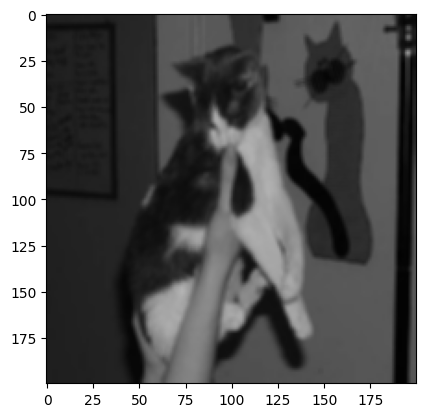

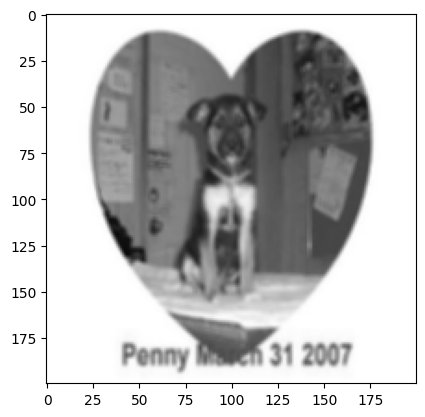

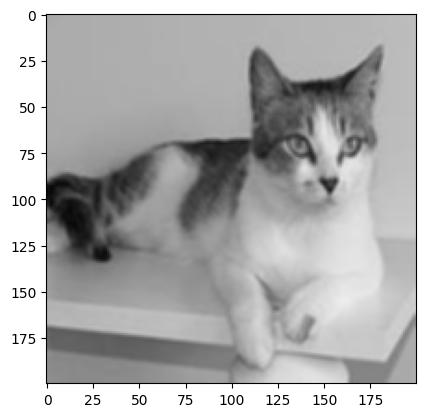

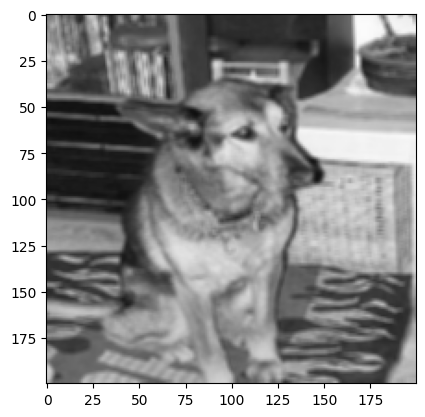

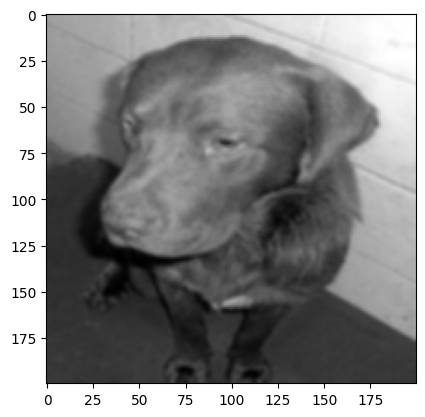

In [ ]:
seed(RANDOM_SEED)
sample_images = []

# pick a random sample of images
for i in range(5):
  value = randint(0, len(train_images)-1)
  print(f'Image Id: {value}')
  sample_images.append(train_images[value])

# apply preprocessing and show output images
for img in sample_images:
  img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_blurred = cv2.GaussianBlur(img_grayscaled,(3,3), 2)

  plt.imshow(cv2.cvtColor(img_blurred, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
# method to get image features
def get_features_m2(images):
  '''
  images: list of images
  '''
  features_list = []
  for img in images:
    # image preprocessing - gray scaling + smoothing
    img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_blurred = cv2.GaussianBlur(img_grayscaled,(3,3), 2)

    # image vectorisation/ feature extraction
    features = img_blurred.flatten()

    features_list.append(features)

  features_list = np.array(features_list)
  return features_list

In [ ]:
# feature extraction
features_train = get_features_m2(train_images)
print(features_train.shape)

(10000, 40000)


Accuracy: 0.513


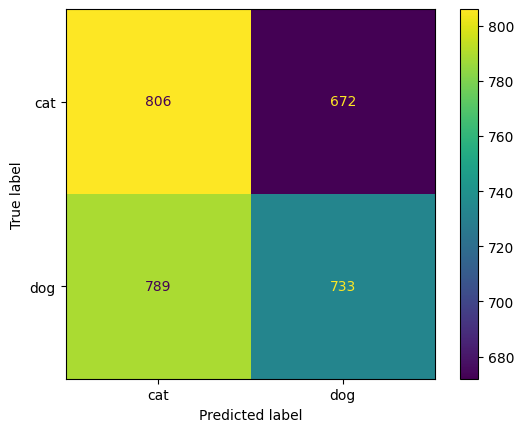

In [ ]:
# data split for train and validation
X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'], test_size=0.3, random_state=RANDOM_SEED)

# train model
m2 = get_svm_predictions(X_train, X_val, y_train, y_val)

In [ ]:
# feature extraction - test data
features_test = get_features_m2(test_images)
print(features_test.shape)

# get model predictions
predictions = m2.predict(features_test)

print(predictions)

(1000, 40000)
['cat' 'cat' 'dog' 'cat' 'cat' 'dog' 'cat' 'dog' 'cat' 'cat' 'cat' 'dog'
 'dog' 'cat' 'dog' 'dog' 'dog' 'dog' 'dog' 'cat' 'dog' 'cat' 'dog' 'dog'
 'cat' 'cat' 'dog' 'cat' 'cat' 'cat' 'cat' 'dog' 'dog' 'cat' 'cat' 'cat'
 'cat' 'cat' 'dog' 'cat' 'dog' 'cat' 'cat' 'cat' 'cat' 'cat' 'dog' 'cat'
 'dog' 'cat' 'dog' 'cat' 'cat' 'cat' 'dog' 'cat' 'dog' 'cat' 'cat' 'dog'
 'cat' 'cat' 'cat' 'cat' 'dog' 'cat' 'dog' 'cat' 'dog' 'cat' 'cat' 'dog'
 'dog' 'cat' 'cat' 'dog' 'cat' 'cat' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog'
 'cat' 'cat' 'dog' 'dog' 'cat' 'dog' 'cat' 'cat' 'cat' 'cat' 'dog' 'dog'
 'cat' 'cat' 'cat' 'cat' 'dog' 'dog' 'cat' 'dog' 'cat' 'cat' 'cat' 'cat'
 'cat' 'cat' 'dog' 'dog' 'dog' 'dog' 'dog' 'cat' 'dog' 'cat' 'cat' 'cat'
 'dog' 'cat' 'dog' 'cat' 'dog' 'cat' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog'
 'cat' 'cat' 'cat' 'dog' 'dog' 'cat' 'cat' 'cat' 'cat' 'cat' 'dog' 'cat'
 'dog' 'cat' 'dog' 'dog' 'cat' 'cat' 'dog' 'cat' 'cat' 'cat' 'dog' 'cat'
 'dog' 'dog' 'dog' 'cat' 'cat' 'cat' 

#SVM_M3

In [ ]:
# method to get image features
def get_features_m3(images):
  '''
  images: list of images
  '''
  features_list = []
  for img in images:
    # image preprocessing
    img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # feature extraction
    edges_canny = cv2.Canny(img_grayscaled, 100, 200)
    features = edges_canny.flatten()

    features_list.append(features)

  features_list = np.array(features_list)
  return features_list

In [ ]:
# feature extraction
features_train = get_features_m3(train_images)
print(features_train.shape)

(10000, 40000)


Accuracy: 0.5753333333333334


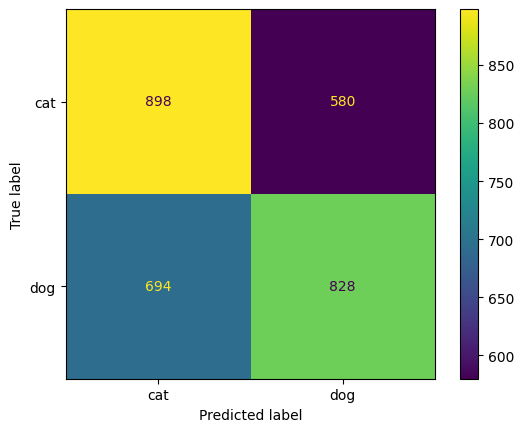

In [ ]:
# data split for train and validation
X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'], test_size=0.3, random_state=RANDOM_SEED)

# train model
m3 = get_svm_predictions(X_train, X_val, y_train, y_val)

In [ ]:
# feature extraction - test data
features_test = get_features_m3(test_images)
print(features_test.shape)

# get model predictions
predictions = m3.predict(features_test)

print(predictions)

(1000, 40000)
['dog' 'cat' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'cat'
 'cat' 'dog' 'dog' 'cat' 'dog' 'dog' 'dog' 'cat' 'cat' 'dog' 'dog' 'cat'
 'dog' 'dog' 'cat' 'cat' 'cat' 'cat' 'dog' 'dog' 'cat' 'dog' 'dog' 'cat'
 'dog' 'cat' 'dog' 'cat' 'cat' 'cat' 'cat' 'dog' 'cat' 'dog' 'cat' 'dog'
 'cat' 'cat' 'dog' 'cat' 'cat' 'cat' 'dog' 'cat' 'cat' 'cat' 'dog' 'cat'
 'cat' 'cat' 'dog' 'cat' 'dog' 'cat' 'cat' 'cat' 'dog' 'cat' 'dog' 'cat'
 'cat' 'cat' 'dog' 'dog' 'cat' 'dog' 'dog' 'cat' 'dog' 'dog' 'dog' 'cat'
 'dog' 'cat' 'cat' 'cat' 'cat' 'dog' 'dog' 'cat' 'dog' 'dog' 'cat' 'dog'
 'cat' 'dog' 'cat' 'dog' 'cat' 'cat' 'dog' 'cat' 'cat' 'cat' 'dog' 'cat'
 'cat' 'cat' 'cat' 'dog' 'cat' 'dog' 'cat' 'dog' 'cat' 'cat' 'dog' 'dog'
 'cat' 'cat' 'cat' 'dog' 'cat' 'cat' 'dog' 'cat' 'dog' 'dog' 'dog' 'cat'
 'cat' 'dog' 'cat' 'cat' 'cat' 'cat' 'cat' 'dog' 'dog' 'dog' 'dog' 'dog'
 'cat' 'cat' 'dog' 'cat' 'cat' 'dog' 'cat' 'dog' 'dog' 'cat' 'cat' 'cat'
 'cat' 'dog' 'dog' 'dog' 'cat' 'dog' 

#SVM_M4

In [ ]:
# method to get image features
def get_features_m4(images):
  '''
  images: list of images
  '''
  features_list = []
  for img in images:
    # image preprocessing
    img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Resize image if necessary
    img_resized = cv2.resize(img_grayscaled, (64, 128))

    # feature extraction
    features, hog_image = hog(img_resized, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True)

    features_list.append(features)

  features_list = np.array(features_list)
  return features_list

In [ ]:
# feature extraction
features_train = get_features_m4(train_images)
print(features_train.shape)

(10000, 3780)


Accuracy: 0.6696666666666666


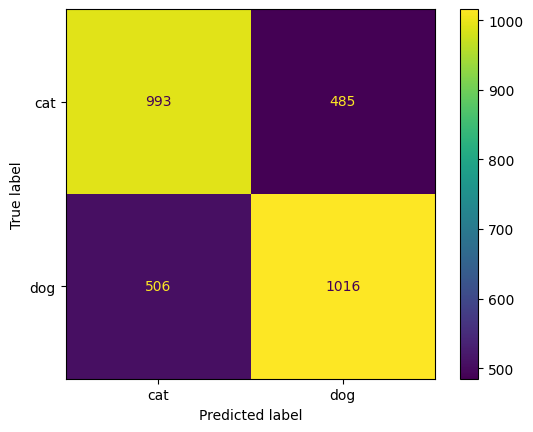

In [ ]:
# data split for train and validation
X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'], test_size=0.3, random_state=RANDOM_SEED)

# train model
m4 = get_svm_predictions(X_train, X_val, y_train, y_val)

In [ ]:
# feature extraction - test data
features_test = get_features_m4(test_images)
print(features_test.shape)

# get model predictions
predictions = m4.predict(features_test)
print(predictions)

(1000, 3780)
['dog' 'cat' 'cat' 'cat' 'dog' 'cat' 'cat' 'cat' 'cat' 'cat' 'dog' 'dog'
 'cat' 'cat' 'dog' 'dog' 'cat' 'dog' 'cat' 'dog' 'dog' 'dog' 'dog' 'cat'
 'dog' 'dog' 'dog' 'cat' 'cat' 'cat' 'cat' 'dog' 'dog' 'cat' 'cat' 'dog'
 'dog' 'dog' 'dog' 'cat' 'dog' 'dog' 'dog' 'cat' 'dog' 'dog' 'cat' 'cat'
 'cat' 'dog' 'cat' 'dog' 'dog' 'dog' 'dog' 'cat' 'dog' 'cat' 'cat' 'cat'
 'dog' 'cat' 'cat' 'dog' 'dog' 'cat' 'cat' 'dog' 'cat' 'dog' 'cat' 'cat'
 'cat' 'cat' 'dog' 'cat' 'cat' 'dog' 'cat' 'dog' 'cat' 'dog' 'dog' 'cat'
 'dog' 'dog' 'cat' 'cat' 'dog' 'dog' 'dog' 'dog' 'cat' 'dog' 'dog' 'cat'
 'cat' 'cat' 'dog' 'dog' 'cat' 'cat' 'dog' 'dog' 'cat' 'dog' 'cat' 'cat'
 'cat' 'dog' 'cat' 'dog' 'dog' 'cat' 'cat' 'cat' 'dog' 'dog' 'cat' 'dog'
 'cat' 'dog' 'cat' 'dog' 'cat' 'cat' 'dog' 'cat' 'dog' 'cat' 'dog' 'cat'
 'cat' 'cat' 'dog' 'cat' 'dog' 'dog' 'dog' 'cat' 'dog' 'dog' 'dog' 'dog'
 'cat' 'cat' 'dog' 'cat' 'cat' 'dog' 'cat' 'dog' 'dog' 'dog' 'cat' 'dog'
 'dog' 'cat' 'dog' 'cat' 'dog' 'cat' '

#SVM_M5

In [ ]:
# method to get image features
def get_features_m5(images):
  features_list = []
  for img in images:
    # image preprocessing
    img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # feature extraction
    edges_canny = cv2.Canny(img_grayscaled, 100, 200)
    features1 = img_grayscaled.flatten()
    features2 = edges_canny.flatten()
    features = np.hstack((features1, features2))

    features_list.append(features)

  features_list = np.array(features_list)
  return features_list

In [ ]:
# feature extraction
features_train = get_features_m5(train_images)
print(features_train.shape)

(10000, 80000)


Accuracy: 0.5786666666666667


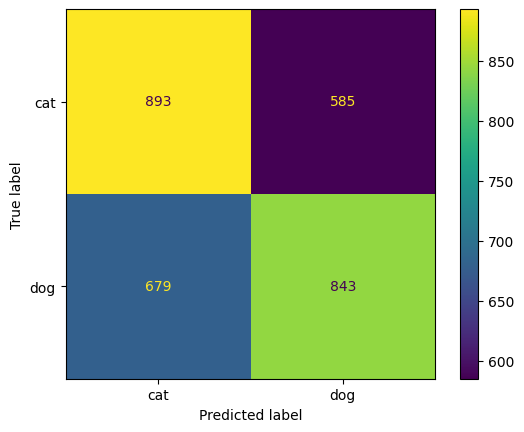

In [ ]:
# data split for train and validation
X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'], test_size=0.3, random_state=RANDOM_SEED)

# train model
m5 = get_svm_predictions(X_train, X_val, y_train, y_val)

In [ ]:
# feature extraction - test data
features_test = get_features_m5(test_images)
print(features_test.shape)

# get model predictions
predictions = m5.predict(features_test)
print(predictions)

(1000, 80000)
['dog' 'cat' 'cat' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'cat' 'dog' 'cat'
 'cat' 'dog' 'dog' 'cat' 'dog' 'dog' 'dog' 'cat' 'cat' 'dog' 'dog' 'cat'
 'dog' 'dog' 'cat' 'cat' 'cat' 'cat' 'dog' 'dog' 'cat' 'dog' 'cat' 'cat'
 'dog' 'cat' 'dog' 'cat' 'cat' 'dog' 'cat' 'dog' 'dog' 'dog' 'cat' 'cat'
 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'dog' 'cat' 'cat' 'cat' 'dog' 'cat'
 'cat' 'cat' 'dog' 'cat' 'dog' 'cat' 'cat' 'cat' 'dog' 'cat' 'dog' 'cat'
 'cat' 'cat' 'cat' 'dog' 'cat' 'dog' 'cat' 'cat' 'dog' 'dog' 'dog' 'cat'
 'dog' 'cat' 'cat' 'cat' 'cat' 'cat' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog'
 'cat' 'dog' 'cat' 'dog' 'dog' 'cat' 'dog' 'dog' 'cat' 'cat' 'dog' 'cat'
 'cat' 'cat' 'cat' 'dog' 'dog' 'dog' 'cat' 'cat' 'cat' 'cat' 'dog' 'dog'
 'cat' 'cat' 'cat' 'dog' 'cat' 'cat' 'dog' 'dog' 'dog' 'dog' 'dog' 'cat'
 'cat' 'dog' 'cat' 'cat' 'cat' 'cat' 'cat' 'dog' 'dog' 'dog' 'dog' 'dog'
 'cat' 'cat' 'dog' 'cat' 'cat' 'dog' 'cat' 'dog' 'dog' 'cat' 'cat' 'cat'
 'cat' 'dog' 'dog' 'dog' 'cat' 'dog' 

#LOGISTIC REGRESSION

##LG_M1

In [ ]:
# method to train and predict using SVM classifier
def get_lr_predictions(X_train, X_val, y_train, y_val):
  # build model
  lr = LogisticRegression(max_iter=1000)
  lr.fit(X_train, y_train)

  # Make predictions on test data
  y_pred = lr.predict(X_val)

  # evalution
  evaluate(y_val, y_pred, lr.classes_)

  return lr

(10000, 40000)
Accuracy: 0.517


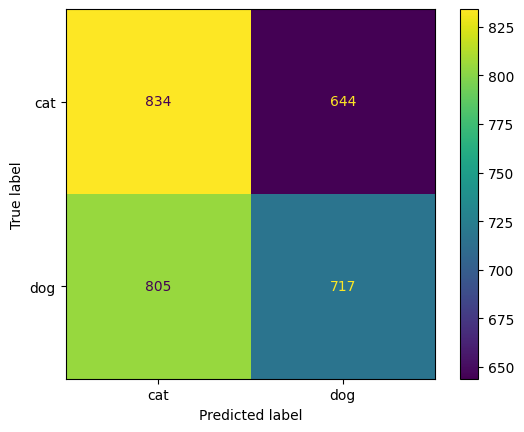

In [ ]:
# feature extraction
features_train = get_features_m1(train_images)
print(features_train.shape)

# data split for train and validation
X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'], test_size=0.3, random_state=RANDOM_SEED)
# train model
lr1 = get_lr_predictions(X_train, X_val, y_train, y_val)

In [ ]:
# feature extraction - test data
features_test = get_features_m1(test_images)
print(features_test.shape)

# get model predictions
predictions = lr1.predict(features_test)
print(predictions)

(1000, 40000)
['cat' 'cat' 'cat' 'cat' 'cat' 'dog' 'dog' 'dog' 'dog' 'cat' 'cat' 'dog'
 'cat' 'cat' 'cat' 'dog' 'dog' 'dog' 'dog' 'cat' 'dog' 'dog' 'dog' 'dog'
 'dog' 'cat' 'dog' 'cat' 'cat' 'cat' 'cat' 'dog' 'dog' 'cat' 'cat' 'dog'
 'dog' 'dog' 'dog' 'cat' 'dog' 'cat' 'cat' 'cat' 'cat' 'dog' 'dog' 'cat'
 'dog' 'cat' 'cat' 'cat' 'dog' 'dog' 'dog' 'cat' 'dog' 'dog' 'cat' 'dog'
 'cat' 'dog' 'cat' 'cat' 'dog' 'cat' 'dog' 'cat' 'dog' 'cat' 'cat' 'dog'
 'dog' 'cat' 'cat' 'dog' 'dog' 'cat' 'cat' 'dog' 'dog' 'dog' 'dog' 'cat'
 'cat' 'cat' 'dog' 'cat' 'cat' 'cat' 'cat' 'dog' 'dog' 'cat' 'dog' 'dog'
 'cat' 'dog' 'cat' 'cat' 'dog' 'cat' 'cat' 'dog' 'cat' 'dog' 'cat' 'cat'
 'cat' 'cat' 'dog' 'dog' 'dog' 'dog' 'dog' 'cat' 'dog' 'cat' 'dog' 'cat'
 'dog' 'cat' 'cat' 'cat' 'dog' 'dog' 'dog' 'dog' 'dog' 'cat' 'dog' 'dog'
 'cat' 'cat' 'cat' 'dog' 'cat' 'cat' 'cat' 'dog' 'cat' 'cat' 'dog' 'dog'
 'dog' 'cat' 'dog' 'dog' 'dog' 'dog' 'cat' 'cat' 'dog' 'cat' 'cat' 'cat'
 'cat' 'dog' 'cat' 'dog' 'cat' 'dog' 

##LG_M2

(10000, 40000)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.5003333333333333


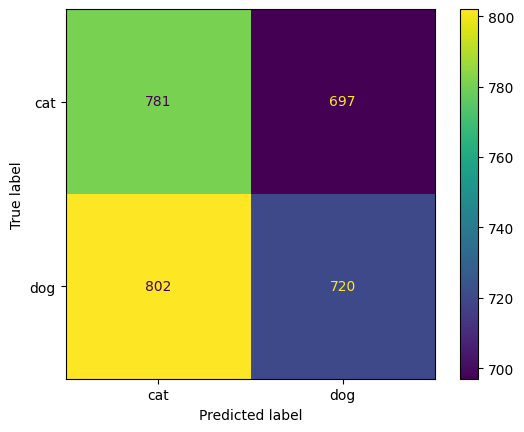

In [ ]:
# feature extraction
features_train = get_features_m2(train_images)
print(features_train.shape)
# data split for train and validation
X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'], test_size=0.3, random_state=RANDOM_SEED)

# train model
lr2 = get_lr_predictions(X_train, X_val, y_train, y_val)

##LG_M3

(10000, 40000)
Accuracy: 0.5523333333333333


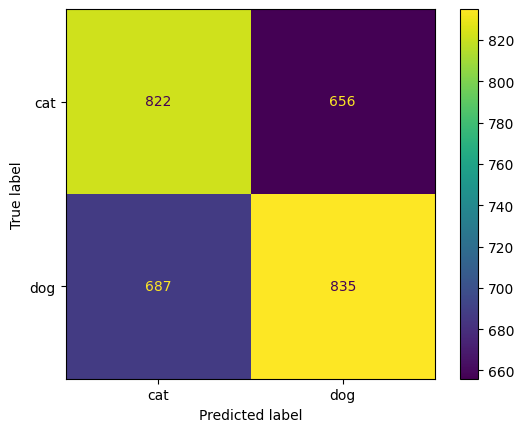

In [ ]:
# feature extraction
features_train = get_features_m3(train_images)
print(features_train.shape)

# data split for train and validation
X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'], test_size=0.3, random_state=RANDOM_SEED)

# train model
lr3 = get_lr_predictions(X_train, X_val, y_train, y_val)

##LG_M4

(10000, 3780)
Accuracy: 0.686


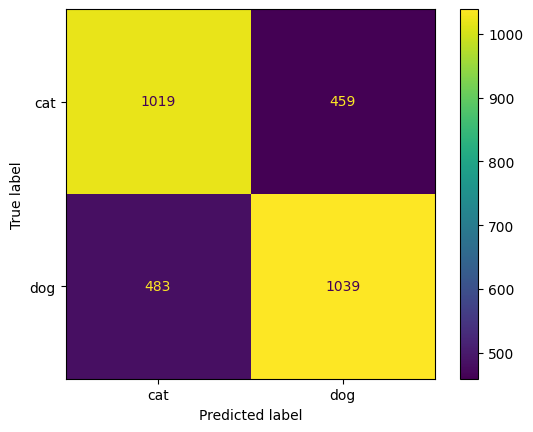

In [ ]:
# feature extraction
features_train = get_features_m4(train_images)
print(features_train.shape)

# data split for train and validation
X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'], test_size=0.3, random_state=RANDOM_SEED)

# train model
lr4 = get_lr_predictions(X_train, X_val, y_train, y_val)

##LG_M5

(10000, 80000)
Accuracy: 0.5626666666666666


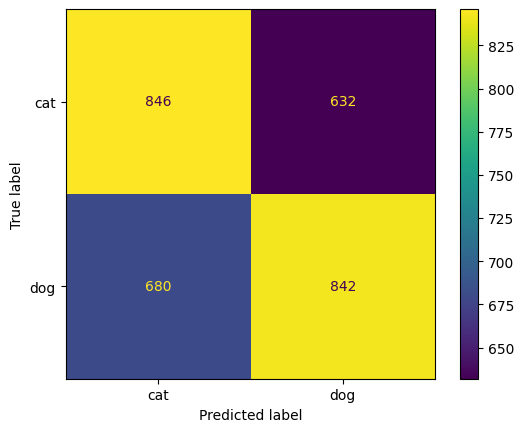

In [ ]:
# feature extraction
features_train = get_features_m5(train_images)
print(features_train.shape)

# data split for train and validation
X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'], test_size=0.3, random_state=RANDOM_SEED)

# train model
lr5 = get_lr_predictions(X_train, X_val, y_train, y_val)

#RANDOM FOREST

In [ ]:
# method to train and predict using SVM classifier
def get_rf_predictions(X_train, X_val, y_train, y_val):
  # build model
  rf = RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED)
  rf.fit(X_train, y_train)

  # Make predictions on test data
  y_pred = rf.predict(X_val)

  # evalution
  evaluate(y_val, y_pred, rf.classes_)

  return rf

##RF_M1

(10000, 40000)
Accuracy: 0.6073333333333333


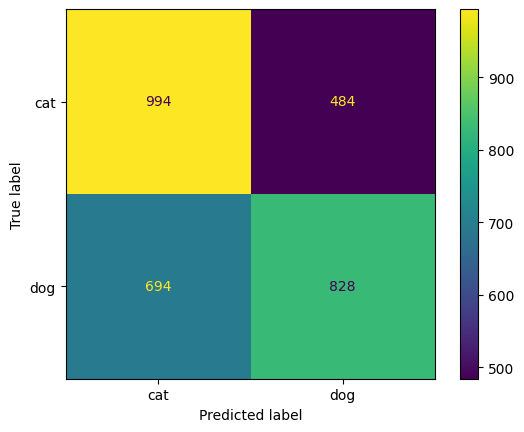

In [ ]:
# feature extraction
features_train = get_features_m1(train_images)
print(features_train.shape)

# data split for train and validation
X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'], test_size=0.3, random_state=RANDOM_SEED)
# train model
rf1 = get_rf_predictions(X_train, X_val, y_train, y_val)

##RF_M2

(10000, 40000)
Accuracy: 0.61


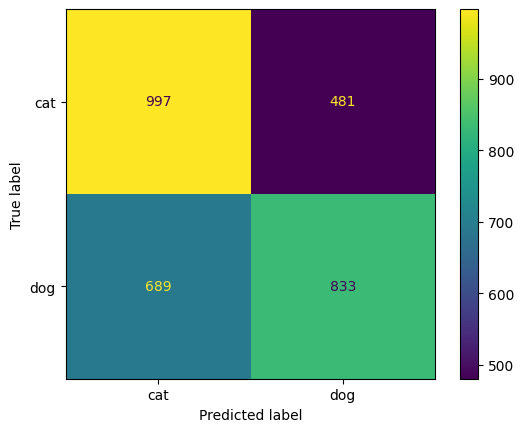

In [ ]:
# feature extraction
features_train = get_features_m2(train_images)
print(features_train.shape)
# data split for train and validation
X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'], test_size=0.3, random_state=RANDOM_SEED)

# train model
rf2 = get_rf_predictions(X_train, X_val, y_train, y_val)

##RF_M3

(10000, 40000)
Accuracy: 0.5866666666666667


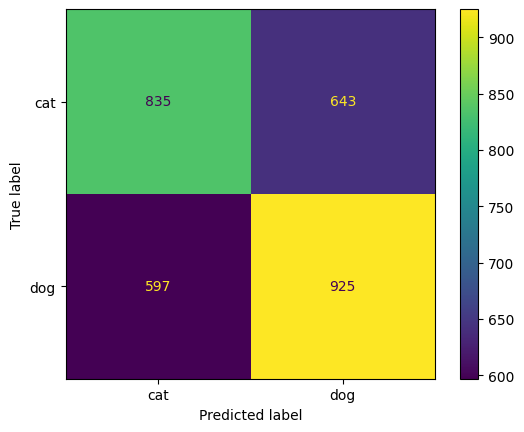

In [ ]:
# feature extraction
features_train = get_features_m3(train_images)
print(features_train.shape)

# data split for train and validation
X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'], test_size=0.3, random_state=RANDOM_SEED)

# train model
rf3 = get_rf_predictions(X_train, X_val, y_train, y_val)

##RF_M4

(10000, 3780)
Accuracy: 0.701


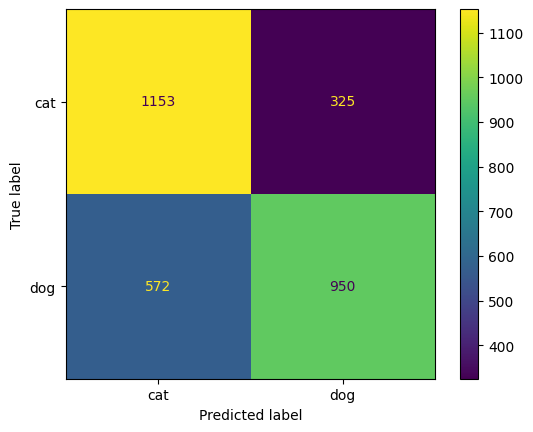

In [ ]:
# feature extraction
features_train = get_features_m4(train_images)
print(features_train.shape)

# data split for train and validation
X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'], test_size=0.3, random_state=RANDOM_SEED)

# train model
rf4 = get_rf_predictions(X_train, X_val, y_train, y_val)

##RF_M5

(10000, 80000)
Accuracy: 0.6326666666666667


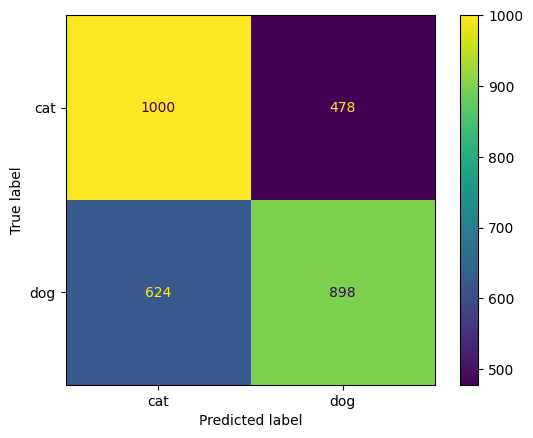

In [ ]:
# feature extraction
features_train = get_features_m5(train_images)
print(features_train.shape)

# data split for train and validation
X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'], test_size=0.3, random_state=RANDOM_SEED)

# train model
rf5 = get_rf_predictions(X_train, X_val, y_train, y_val)

#CONVOLUTIONAL NEURAL NETWORK

In [ ]:
import cv2
import numpy as np
import pandas as pd
from random import randint
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from skimage.feature import hog
import matplotlib.pyplot as plt
from tensorflow.keras import Input

# Define a random seed for reproducibility
RANDOM_SEED = 42


In [ ]:
def build_cnn(input_shape):
    model = Sequential([
         Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
         MaxPooling2D((2,2)),
         Conv2D(64, (3,3), activation='relu'),
         MaxPooling2D((2,2)),
         Flatten(),
         Dense(128, activation='relu'),
         Dropout(0.5),
         Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
keras.backend.clear_session()

###CNN Variant 1 (CNN_M1) – Grayscale Only

In [ ]:
def get_features_m1_cnn(images):
    features_list = []
    for img in images:
        # Convert to grayscale
        img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Optionally resize if images are not uniform; e.g., cv2.resize(img_grayscaled, (64,64))
        # Add channel dimension: shape becomes (height, width, 1)
        img_processed = np.expand_dims(img_grayscaled, axis=-1)
        features_list.append(img_processed)
    return np.array(features_list)

# Feature extraction for training and test images
features_train = get_features_m1_cnn(train_images)
print("CNN_M1 - train features shape:", features_train.shape)
X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'], test_size=0.2, random_state=RANDOM_SEED)
# Convert y_train and y_val to numeric type if they are not already
y_train = y_train.map({'dog': 1, 'cat': 0}).astype(int)
y_val = y_val.map({'dog': 1, 'cat': 0}).astype(int)  # Do the same for y_val
features_test = get_features_m1_cnn(test_images)
print("CNN_M1 - test features shape:", features_test.shape)

# Build and train CNN_M1
input_shape = X_train[0].shape
model_cnn_m1 = build_cnn(input_shape)
model_cnn_m1.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
predictions_m1 = model_cnn_m1.predict(features_test)
# print("CNN_M1 Predictions:", predictions_m1)


CNN_M1 - train features shape: (10000, 200, 200, 1)
CNN_M1 - test features shape: (1000, 200, 200, 1)
Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5218 - loss: 50.2137 - val_accuracy: 0.5450 - val_loss: 0.6876
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6700 - loss: 0.6177 - val_accuracy: 0.5745 - val_loss: 0.7346
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7841 - loss: 0.4592 - val_accuracy: 0.5895 - val_loss: 0.7424
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8577 - loss: 0.3244 - val_accuracy: 0.6225 - val_loss: 0.9428
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9143 - loss: 0.2193 - val_accuracy: 0.6080 - val_loss: 1.1336
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9506 - loss: 0.1524 - val_accuracy: 0.6040 - val_loss: 1.1773
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9504 - loss: 0.1347 - val_accuracy: 0.6105 - val_loss: 1.5334


In [ ]:
keras.backend.clear_session()

###CNN Variant 2 (CNN_M2) – Grayscale + Gaussian Blur

In [ ]:
def get_features_m2_cnn(images):
    features_list = []
    for img in images:
        img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_blurred = cv2.GaussianBlur(img_grayscaled, (3,3), 2)
        img_processed = np.expand_dims(img_blurred, axis=-1)
        features_list.append(img_processed)
    return np.array(features_list)

X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'], test_size=0.2, random_state=RANDOM_SEED)
# Convert y_train and y_val to numeric type if they are not already
y_train = y_train.map({'dog': 1, 'cat': 0}).astype(int)
y_val = y_val.map({'dog': 1, 'cat': 0}).astype(int)  # Do the same for y_val
features_test = get_features_m2_cnn(test_images)
print("CNN_M2 - test features shape:", features_test.shape)

input_shape = X_train[0].shape
model_cnn_m2 = build_cnn(input_shape)
model_cnn_m2.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
predictions_m2 = model_cnn_m2.predict(features_test)
# print("CNN_M2 Predictions:", predictions_m2)


CNN_M2 - test features shape: (1000, 200, 200, 1)
Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5118 - loss: 60.3068 - val_accuracy: 0.5345 - val_loss: 0.6930
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5950 - loss: 0.6630 - val_accuracy: 0.5510 - val_loss: 0.6890
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6214 - loss: 0.6213 - val_accuracy: 0.5435 - val_loss: 0.7321
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6970 - loss: 0.5386 - val_accuracy: 0.5545 - val_loss: 0.8053
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7471 - loss: 0.4901 - val_accuracy: 0.5745 - val_loss: 0.9200
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8077 - loss: 0.3956 - val_accuracy: 0.5740 - val_loss: 1.2366
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8588 - loss: 0.2994 - val_accuracy: 0.5590 - val_loss: 1.4691
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step 

In [ ]:
keras.backend.clear_session()

###CNN Variant 3 (CNN_M3) – Grayscale + Canny Edge Detection

In [ ]:
def get_features_m3_cnn(images):
    features_list = []
    for img in images:
        img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        edges_canny = cv2.Canny(img_grayscaled, 100, 200)
        img_processed = np.expand_dims(edges_canny, axis=-1)
        features_list.append(img_processed)
    return np.array(features_list)

X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'], test_size=0.2, random_state=RANDOM_SEED)
# Convert y_train and y_val to numeric type if they are not already
y_train = y_train.map({'dog': 1, 'cat': 0}).astype(int)
y_val = y_val.map({'dog': 1, 'cat': 0}).astype(int)  # Do the same for y_val
features_test = get_features_m3_cnn(test_images)
print("CNN_M3 - test features shape:", features_test.shape)

input_shape = X_train[0].shape
model_cnn_m3 = build_cnn(input_shape)
model_cnn_m3.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
predictions_m3 = model_cnn_m3.predict(features_test)
# print("CNN_M3 Predictions:", predictions_m3)


CNN_M3 - test features shape: (1000, 200, 200, 1)
Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5405 - loss: 13.2435 - val_accuracy: 0.5415 - val_loss: 0.6860
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6038 - loss: 0.6624 - val_accuracy: 0.5550 - val_loss: 0.7060
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6983 - loss: 0.5734 - val_accuracy: 0.5930 - val_loss: 0.7408
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7925 - loss: 0.4302 - val_accuracy: 0.5880 - val_loss: 0.8630
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8787 - loss: 0.2862 - val_accuracy: 0.5965 - val_loss: 0.9483
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9242 - loss: 0.1899 - val_accuracy: 0.5955 - val_loss: 1.4664
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9113 - loss: 0.3248 - val_accuracy: 0.6020 - val_loss: 1.2711
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step 

In [ ]:
keras.backend.clear_session()

###CNN Variant 4 (CNN_M4) – Grayscale, Resize, and HOG

In [ ]:
def get_features_m4_cnn(images):
    features_list = []
    for img in images:
        img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Resize image to a fixed size, e.g. 64x128
        img_resized = cv2.resize(img_grayscaled, (64, 128))
        # Extract HOG features and the hog visualization image
        features, hog_image = hog(img_resized, orientations=9, pixels_per_cell=(8,8),
                                  cells_per_block=(2,2), visualize=True)
        # Use the hog visualization image (which is 2D) as input to the CNN.
        img_processed = np.expand_dims(hog_image, axis=-1)
        features_list.append(img_processed)
    return np.array(features_list)

features_train = get_features_m4_cnn(train_images)
print("CNN_M4 - train features shape:", features_train.shape)
X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'], test_size=0.3, random_state=RANDOM_SEED)
# Convert y_train and y_val to numeric type if they are not already
y_train = y_train.map({'dog': 1, 'cat': 0}).astype(int)  # Convert labels to 0 and 1
y_val = y_val.map({'dog': 1, 'cat': 0}).astype(int)  # Convert labels to 0 and 1
features_test = get_features_m4_cnn(test_images)
print("CNN_M4 - test features shape:", features_test.shape)

input_shape = X_train[0].shape
model_cnn_m4 = build_cnn(input_shape)
model_cnn_m4.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
predictions_m4 = model_cnn_m4.predict(features_test)
# print("CNN_M4 Predictions:", predictions_m4)


CNN_M4 - train features shape: (10000, 128, 64, 1)
CNN_M4 - test features shape: (1000, 128, 64, 1)
Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.5680 - loss: 2.0352 - val_accuracy: 0.6877 - val_loss: 0.6017
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7052 - loss: 0.5767 - val_accuracy: 0.7010 - val_loss: 0.5854
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7609 - loss: 0.4992 - val_accuracy: 0.7193 - val_loss: 0.5588
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7923 - loss: 0.4424 - val_accuracy: 0.7293 - val_loss: 0.5860
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8274 - loss: 0.3875 - val_accuracy: 0.7280 - val_loss: 0.6079
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8795 - loss: 0.2965 - val_accuracy: 0.7260 - val_loss: 0.6923
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8983 - loss: 0.2411 - val_accuracy: 0.7337 - val_loss: 0.6703
Epo

In [ ]:
keras.backend.clear_session()

###CNN Variant 5 (CNN_M5) – Combine Grayscale and Canny Edge Images

In [ ]:
def get_features_m5_cnn(images):
    features_list = []
    for img in images:
        img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        edges_canny = cv2.Canny(img_grayscaled, 100, 200)
        # Stack along the channel dimension; the resulting shape will be (height, width, 2)
        img_processed = np.dstack((img_grayscaled, edges_canny))
        features_list.append(img_processed)
    return np.array(features_list)

features_train = get_features_m5_cnn(train_images)
print("CNN_M5 - train features shape:", features_train.shape)
X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'], test_size=0.2, random_state=RANDOM_SEED)
# Convert y_train and y_val to numeric type
y_train = y_train.map({'dog': 1, 'cat': 0}).astype(int)  # Convert labels to 0 and 1
y_val = y_val.map({'dog': 1, 'cat': 0}).astype(int)  # Convert labels to 0 and 1
features_test = get_features_m5_cnn(test_images)
print("CNN_M5 - test features shape:", features_test.shape)

input_shape = X_train[0].shape
model_cnn_m5 = build_cnn(input_shape)
model_cnn_m5.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
predictions_m5 = model_cnn_m5.predict(features_test)
print("CNN_M5 Predictions:", predictions_m5)


CNN_M5 - train features shape: (10000, 200, 200, 2)
CNN_M5 - test features shape: (1000, 200, 200, 2)
Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.5003 - loss: 85.4861 - val_accuracy: 0.5405 - val_loss: 0.6924
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6698 - loss: 0.6031 - val_accuracy: 0.5535 - val_loss: 0.7474
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7901 - loss: 0.4223 - val_accuracy: 0.5675 - val_loss: 0.8212
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8898 - loss: 0.2558 - val_accuracy: 0.5825 - val_loss: 1.0662
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9507 - loss: 0.1403 - val_accuracy: 0.5935 - val_loss: 1.3646
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9728 - loss: 0.0857 - val_accuracy: 0.5925 - val_loss: 1.5676
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9811 - loss: 0.0639 - val_accuracy: 0.5840 - val_loss: 1.7255


Number of training entries: 10000
Number of testing entries: 1000

Label distribution:
label
dog    5011
cat    4989
Name: count, dtype: int64
Cats: 49.89%
Dogs: 50.11%

Visualizing sample images:


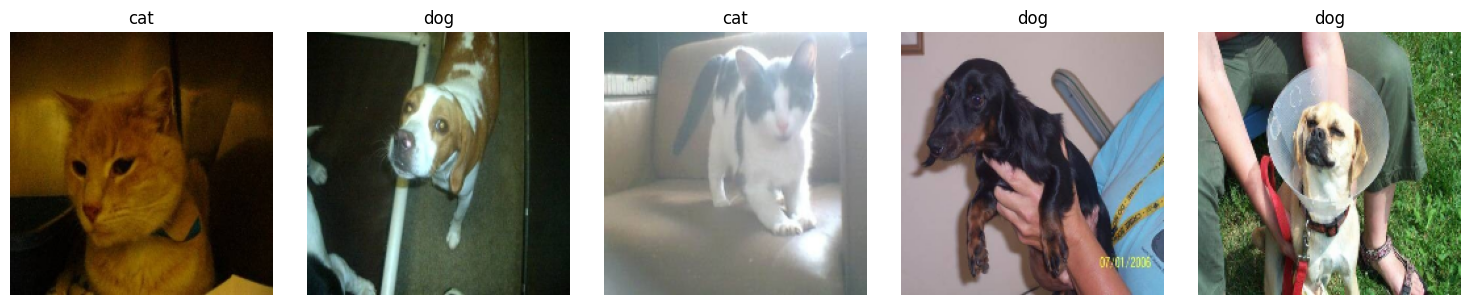


Visualizing preprocessing methods:


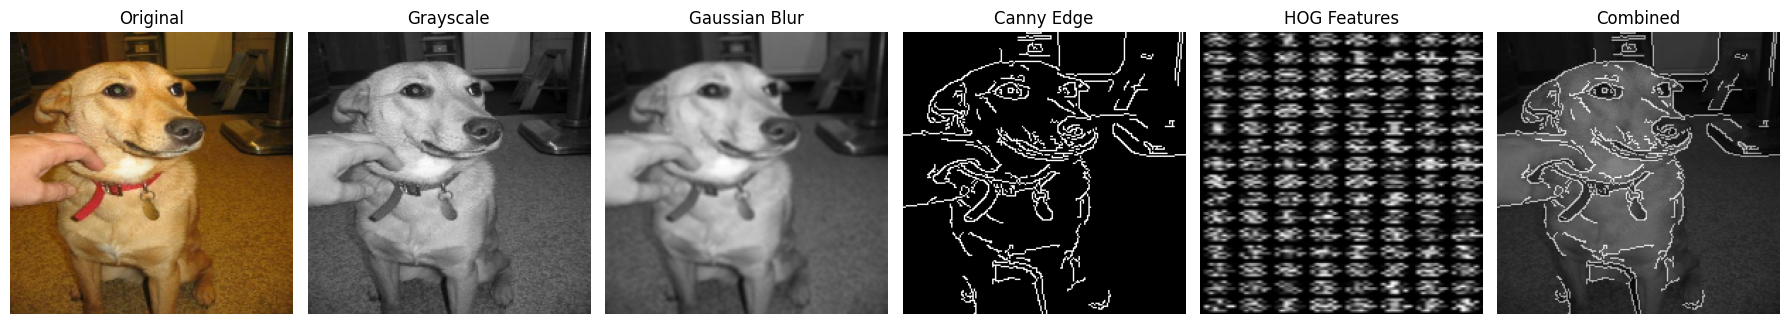

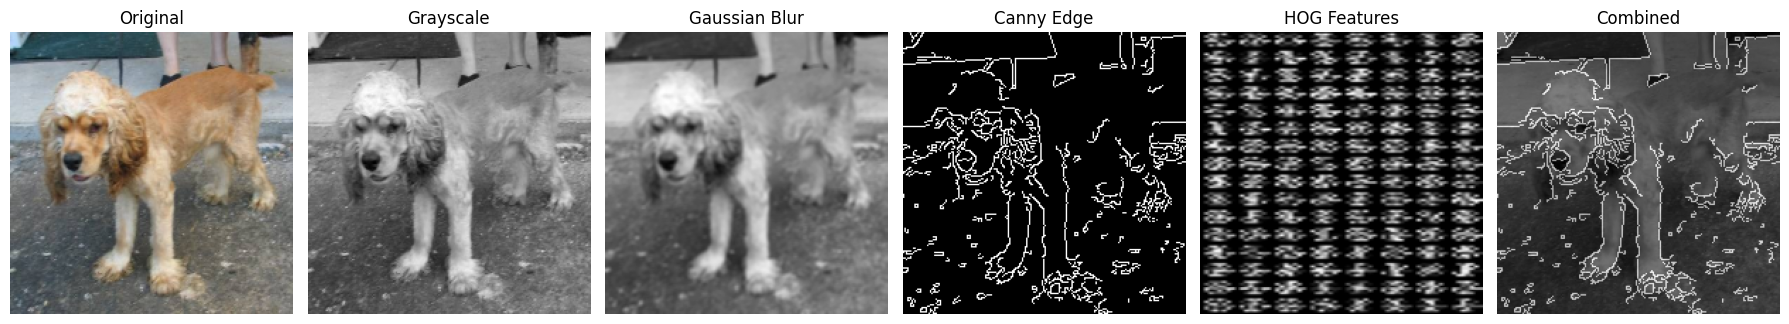

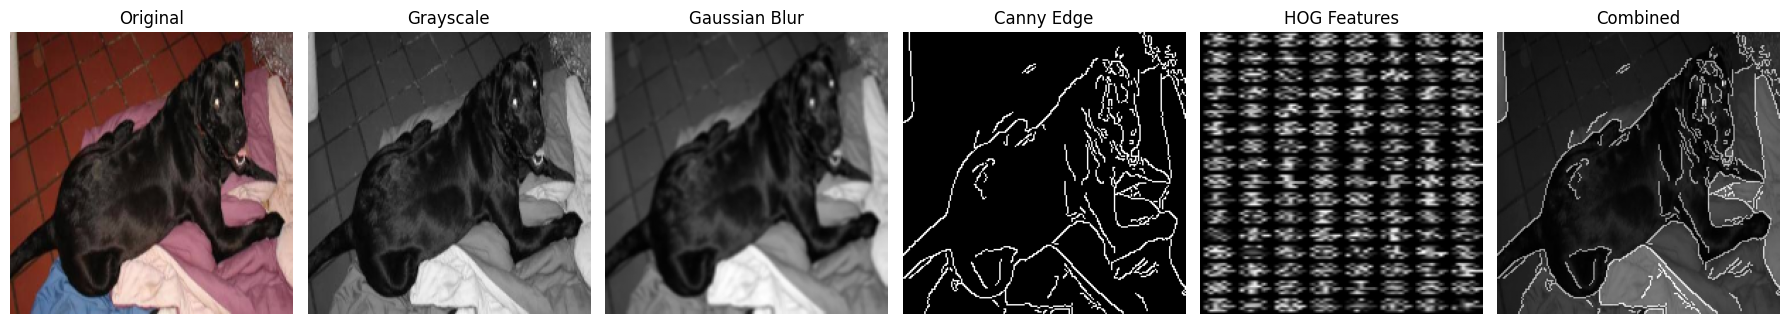


Preparing multi-channel input data for training images...


100%|██████████| 10000/10000 [03:33<00:00, 46.86it/s]


Multi-channel training data shape: (10000, 150, 150, 8)
Training data shape: (7000, 150, 150, 8)
Validation data shape: (3000, 150, 150, 8)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 150, 150, 32)        │           2,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 150, 150, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 150, 150, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 150, 150, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 75, 75, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 75, 75, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 75, 75, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 37, 37, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 37, 37, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 37, 37, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 11,929,537 (45.51 MB)

 Trainable params: 11,926,081 (45.49 MB)

 Non-trainable params: 3,456 (13.50 KB)


Training CNN model with multi-channel input...
Epoch 1/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 37s 95ms/step - accuracy: 0.5642 - loss: 0.9379 - val_accuracy: 0.5600 - val_loss: 0.6985 - learning_rate: 0.0010
Epoch 2/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.6083 - loss: 0.7238 - val_accuracy: 0.6103 - val_loss: 0.6875 - learning_rate: 0.0010
Epoch 3/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.6671 - loss: 0.6265 - val_accuracy: 0.6680 - val_loss: 0.6460 - learning_rate: 0.0010
Epoch 4/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.7126 - loss: 0.5586 - val_accuracy: 0.6917 - val_loss: 0.5802 - learning_rate: 0.0010
Epoch 5/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.7472 - loss: 0.5182 - val_accuracy: 0.7450 - val_loss: 0.5059 - learning_rate: 0.0010
Epoch 6/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.7800 - loss: 0.4726 - val_accuracy: 0.7477 - val_loss: 0.5435 - learning_rate: 0.0010
Epoch 7/30
219/219 ━━━━━━━━━━━━━━

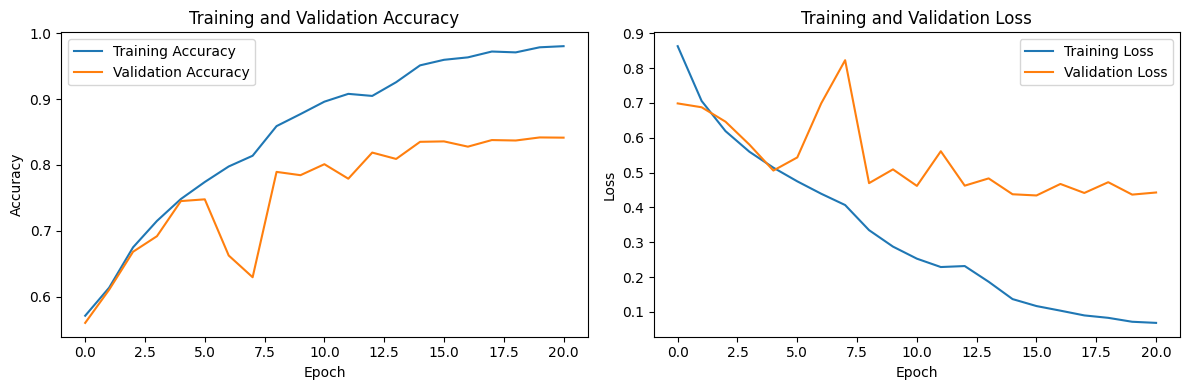


Evaluating model on validation set:
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8449 - loss: 0.4297
Validation Loss: 0.4344
Validation Accuracy: 0.8357
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step

Confusion matrix on validation set:


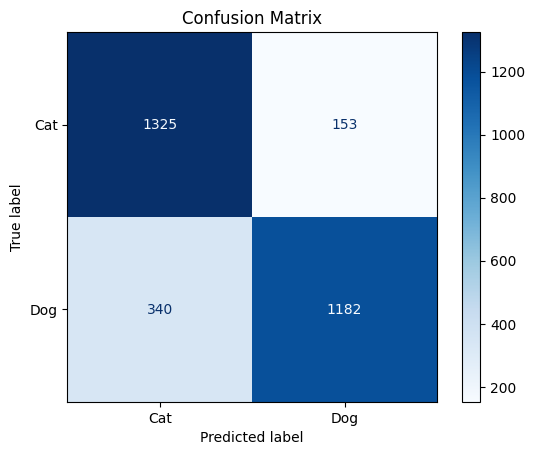

Accuracy: 0.8357
Precision: 0.8854
Recall: 0.7766
F1 Score: 0.8274

Preparing multi-channel input data for test images...


100%|██████████| 1000/1000 [00:21<00:00, 46.92it/s]


Multi-channel test data shape: (1000, 150, 150, 8)

Making predictions on test data...
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


ValueError: Expected a 1D array, got an array with shape (1000, 1000)

In [ ]:
# CNN-Based Cat vs Dog Classification with Advanced Preprocessing
# CMP7229 Image Processing - Prediction Task

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from skimage.feature import hog
from random import seed, randint

# Set random seed for reproducibility
RANDOM_SEED = 100
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

# Define paths
data_folder = './'  # Adjust if needed
train_image_folder = os.path.join(data_folder, 'train_images')
test_image_folder = os.path.join(data_folder, 'test_images')

# Define image dimensions
base_dim = (200, 200)  # For initial loading
img_dim = (150, 150)   # For CNN input

# Load datasets
# print("Loading datasets...")
# df_train = pd.read_csv(os.path.join(data_folder, 'train.csv'))
# df_test = pd.read_csv(os.path.join(data_folder, 'test.csv'))

print(f'Number of training entries: {len(df_train)}')
print(f'Number of testing entries: {len(df_test)}')

# Check label distribution
print("\nLabel distribution:")
print(df_train['label'].value_counts())
print(f"Cats: {df_train['label'].value_counts()['cat'] / len(df_train) * 100:.2f}%")
print(f"Dogs: {df_train['label'].value_counts()['dog'] / len(df_train) * 100:.2f}%")

# Function to load images
# def load_images(ids, folder_path, dim=None):
#     '''
#     ids: list of image ids
#     folder_path: path to image folder
#     dim: dimensions to resize images (optional)
#     '''
#     images = []
#     for id in tqdm(ids):
#         image_path = os.path.join(folder_path, f'{id}.jpg')
#         img = cv2.imread(image_path)

#         # Resize if necessary
#         if dim is not None:
#             if img.shape[0] != dim[1] or img.shape[1] != dim[0]:
#                 img = cv2.resize(img, dim)
#         images.append(img)
#     return images

# # Load images at the base dimension
# print("\nLoading training images...")
# train_images = load_images(df_train['id'], train_image_folder, base_dim)
# print(f'Number of training images loaded: {len(train_images)}')

# print("\nLoading testing images...")
# test_images = load_images(df_test['id'], test_image_folder, base_dim)
# print(f'Number of testing images loaded: {len(test_images)}')

# Visualize sample images
def visualize_samples(images, labels, num_samples=5):
    indices = np.random.choice(len(images), num_samples, replace=False)

    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(indices):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(cv2.cvtColor(images[idx], cv2.COLOR_BGR2RGB))
        plt.title(labels[idx])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

print("\nVisualizing sample images:")
visualize_samples(train_images, df_train['label'])

# Image Preprocessing Functions Based on Your Techniques

# Method 1: Simple Grayscale
def preprocess_m1(img):
    '''
    Simple grayscale conversion
    '''
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Method 2: Grayscale + Gaussian Blur
def preprocess_m2(img):
    '''
    Grayscale + Gaussian blur
    '''
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return cv2.GaussianBlur(img_gray, (3, 3), 2)

# Method 3: Canny Edge Detection
def preprocess_m3(img):
    '''
    Canny edge detection
    '''
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return cv2.Canny(img_gray, 100, 200)

# Method 4: HOG Feature Extraction
def preprocess_m4(img):
    '''
    HOG feature visualization
    '''
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_resized = cv2.resize(img_gray, (64, 128))
    _, hog_img = hog(img_resized, orientations=9, pixels_per_cell=(8, 8),
                   cells_per_block=(2, 2), visualize=True)
    # Normalize HOG image to 0-255 range
    hog_img = (hog_img * 255).astype(np.uint8)
    # Resize back to original dimensions
    hog_img_resized = cv2.resize(hog_img, (img.shape[1], img.shape[0]))
    return hog_img_resized

# Method 5: Combined Preprocessing
def preprocess_m5(img):
    '''
    Combining grayscale and edge detection
    '''
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_edge = cv2.Canny(img_gray, 100, 200)
    # Combine by adding the images
    combined = cv2.addWeighted(img_gray, 0.5, img_edge, 0.5, 0)
    return combined

# Visualize different preprocessing methods for sample images
def visualize_preprocessing(images, num_samples=3):
    indices = np.random.choice(len(images), num_samples, replace=False)

    for idx in indices:
        img = images[idx]

        # Apply different preprocessing methods
        img_gray = preprocess_m1(img)
        img_blur = preprocess_m2(img)
        img_edge = preprocess_m3(img)
        img_hog = preprocess_m4(img)
        img_combined = preprocess_m5(img)

        # Display results
        plt.figure(figsize=(18, 4))

        plt.subplot(1, 6, 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title('Original')
        plt.axis('off')

        plt.subplot(1, 6, 2)
        plt.imshow(img_gray, cmap='gray')
        plt.title('Grayscale')
        plt.axis('off')

        plt.subplot(1, 6, 3)
        plt.imshow(img_blur, cmap='gray')
        plt.title('Gaussian Blur')
        plt.axis('off')

        plt.subplot(1, 6, 4)
        plt.imshow(img_edge, cmap='gray')
        plt.title('Canny Edge')
        plt.axis('off')

        plt.subplot(1, 6, 5)
        plt.imshow(img_hog, cmap='gray')
        plt.title('HOG Features')
        plt.axis('off')

        plt.subplot(1, 6, 6)
        plt.imshow(img_combined, cmap='gray')
        plt.title('Combined')
        plt.axis('off')

        plt.tight_layout()
        plt.show()

print("\nVisualizing preprocessing methods:")
visualize_preprocessing(train_images)

# CNN with Multi-Channel Input Approach
# This approach uses all preprocessing methods as different input channels

def prepare_multi_channel_input(images, target_size=(150, 150)):
    '''
    Prepare multi-channel input with all preprocessing methods
    '''
    X_multi = []

    for img in tqdm(images):
        # Resize original image
        img_resized = cv2.resize(img, target_size)

        # Apply preprocessing methods
        channel1 = cv2.resize(preprocess_m1(img), target_size)  # Grayscale
        channel2 = cv2.resize(preprocess_m2(img), target_size)  # Gaussian Blur
        channel3 = cv2.resize(preprocess_m3(img), target_size)  # Canny Edge
        channel4 = cv2.resize(preprocess_m4(img), target_size)  # HOG
        channel5 = cv2.resize(preprocess_m5(img), target_size)  # Combined

        # Stack channels
        # Original RGB (3 channels) + 5 preprocessing channels = 8 channels
        rgb_channels = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

        # Normalize all channels to [0, 1]
        rgb_norm = rgb_channels / 255.0
        ch1_norm = channel1 / 255.0
        ch2_norm = channel2 / 255.0
        ch3_norm = channel3 / 255.0
        ch4_norm = channel4 / 255.0
        ch5_norm = channel5 / 255.0

        # Stack all normalized channels
        # For the CNN model, we'll use the RGB channels + preprocessed channels
        multi_channel = np.dstack((rgb_norm, ch1_norm, ch2_norm, ch3_norm, ch4_norm, ch5_norm))

        X_multi.append(multi_channel)

    return np.array(X_multi)

# Prepare labels
y_train = np.array([1 if label == 'dog' else 0 for label in df_train['label']])

# Prepare multi-channel input data
print("\nPreparing multi-channel input data for training images...")
X_train_multi = prepare_multi_channel_input(train_images, img_dim)
print(f"Multi-channel training data shape: {X_train_multi.shape}")

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_multi, y_train, test_size=0.3, random_state=RANDOM_SEED)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")

# Build CNN model for multi-channel input
def build_multi_channel_cnn(input_shape):
    model = models.Sequential([
        # First convolutional block
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Second convolutional block
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Third convolutional block
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Fourth convolutional block
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Flatten and dense layers
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')  # Binary classification
    ])

    # Compile model
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Create and display model
input_shape = X_train.shape[1:]  # (height, width, channels)
model = build_multi_channel_cnn(input_shape)
model.summary()

# Define callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=3,
        min_lr=1e-6
    )
]

# Train the model
print("\nTraining CNN model with multi-channel input...")
batch_size = 32
epochs = 30

history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val),
    callbacks=callbacks
)

# Plot training history
def plot_training_history(history):
    # Plot accuracy
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.tight_layout()
    plt.show()

print("\nPlotting training history:")
plot_training_history(history)

# Evaluate model on validation set
print("\nEvaluating model on validation set:")
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Function to display confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    display_labels = ['Cat', 'Dog']
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate metrics
    true_pos = cm[1, 1]
    true_neg = cm[0, 0]
    false_pos = cm[0, 1]
    false_neg = cm[1, 0]

    accuracy = (true_pos + true_neg) / np.sum(cm)
    precision = true_pos / (true_pos + false_pos) if (true_pos + false_pos) > 0 else 0
    recall = true_pos / (true_pos + false_neg) if (true_pos + false_neg) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# Get predictions on validation set
y_val_pred = (model.predict(X_val) > 0.5).astype("int32")
print("\nConfusion matrix on validation set:")
plot_confusion_matrix(y_val, y_val_pred)

# Prepare test data with the same preprocessing
print("\nPreparing multi-channel input data for test images...")
X_test_multi = prepare_multi_channel_input(test_images, img_dim)
print(f"Multi-channel test data shape: {X_test_multi.shape}")

# Make predictions on test data
print("\nMaking predictions on test data...")
test_predictions_prob = model.predict(X_test_multi)
test_predictions = (test_predictions_prob > 0.5).astype("int32")

# Convert numeric predictions back to labels
prediction_labels = ['cat' if pred == 0 else 'dog' for pred in test_predictions]

# Add predictions to test dataframe
df_test['prediction'] = prediction_labels
df_test['confidence'] = np.where(test_predictions == 0, 1 - test_predictions_prob.flatten(), test_predictions_prob.flatten())

# Display sample predictions
print("\nSample predictions:")
print(df_test.head(10))

# Visualize some test predictions
def visualize_test_predictions(images, predictions, confidences, num_samples=5):
    indices = np.random.choice(len(images), num_samples, replace=False)

    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(indices):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(cv2.cvtColor(images[idx], cv2.COLOR_BGR2RGB))
        plt.title(f"Pred: {predictions[idx]}\nConf: {confidences[idx]:.2f}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

print("\nVisualizing sample predictions:")
visualize_test_predictions(test_images, prediction_labels, df_test['confidence'].values)

# Save predictions to CSV
output_path = os.path.join(data_folder, 'test-predictions-cnn.csv')
df_test.to_csv(output_path, index=False)
print(f"\nPredictions saved to {output_path}")

print("\n===== Complete =====")

Number of training entries: 10000
Number of testing entries: 1000

Label distribution:
label
dog    5011
cat    4989
Name: count, dtype: int64
Cats: 49.89%
Dogs: 50.11%

Visualizing sample images:


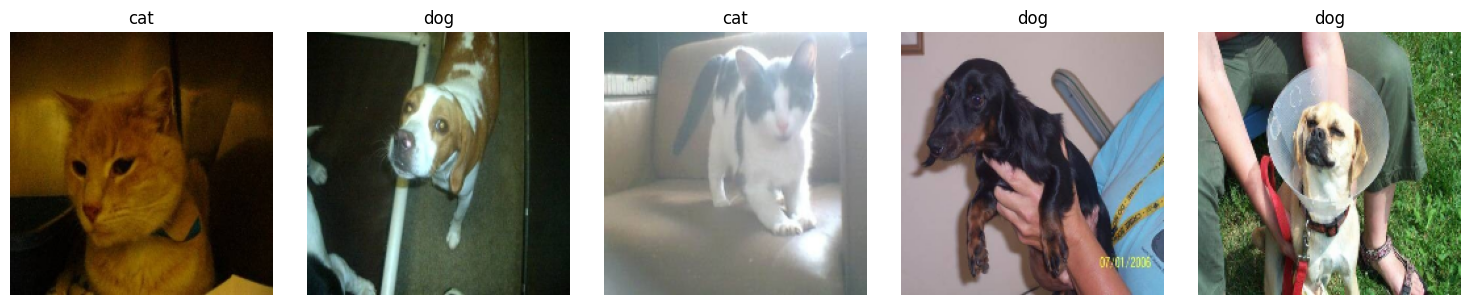


Visualizing preprocessing methods:


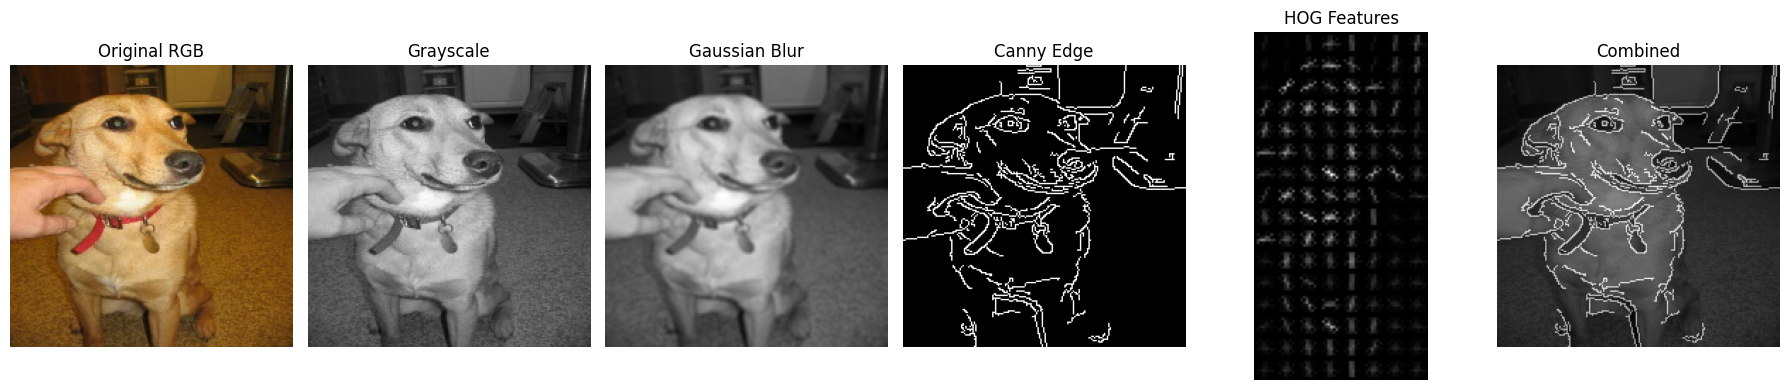

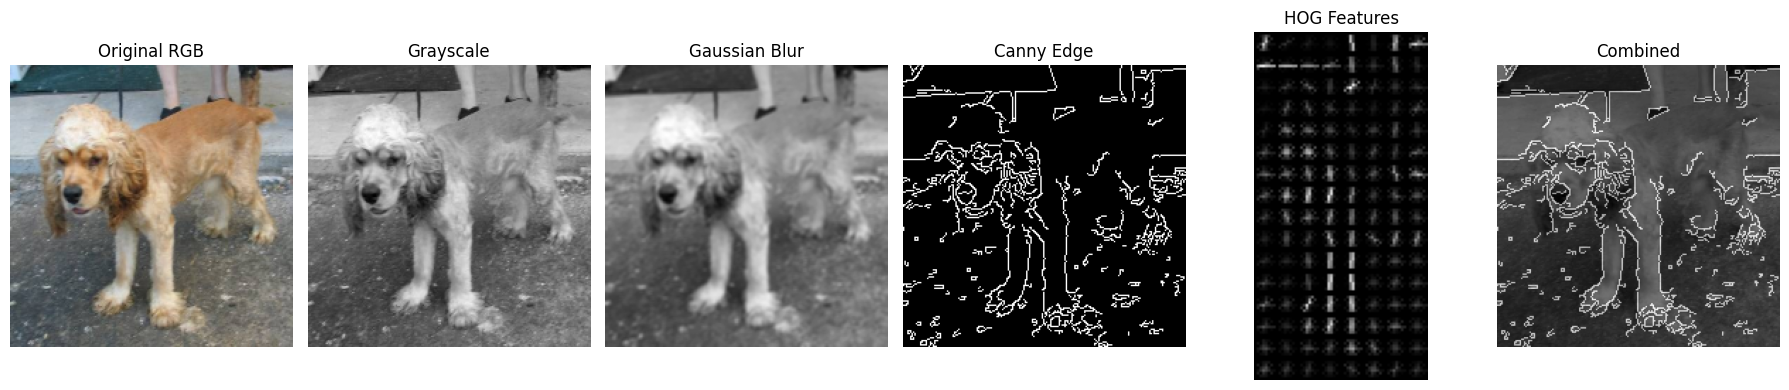

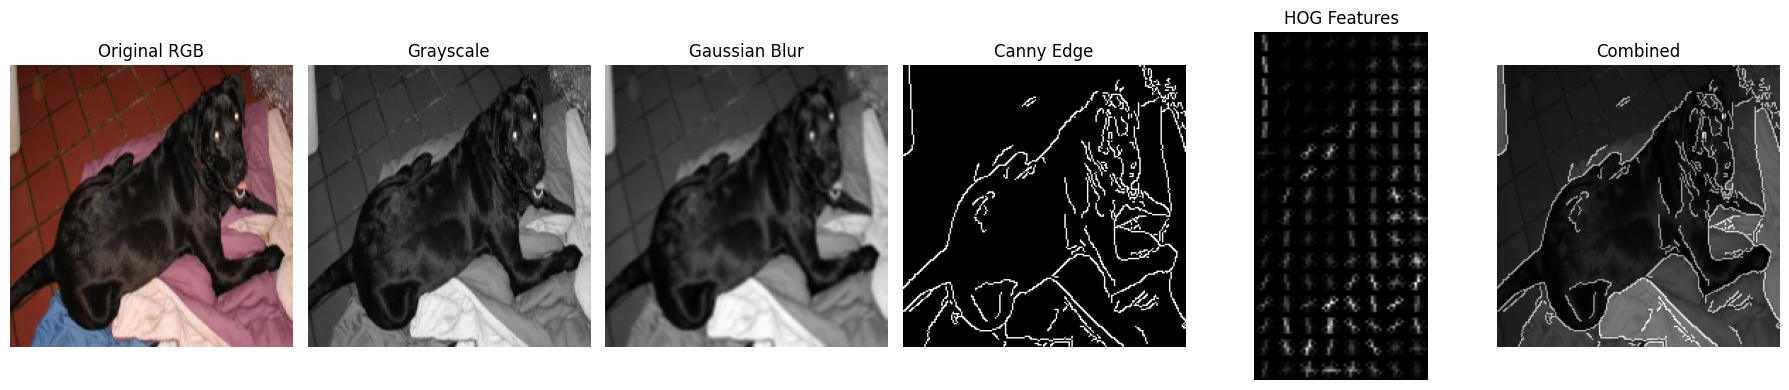

In [ ]:
# CNN-Based Cat vs Dog Classification with Individual Preprocessing Techniques
# CMP7229 Image Processing - Prediction Task

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from skimage.feature import hog
from random import seed, randint

# Set random seed for reproducibility
RANDOM_SEED = 100
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

# Define paths
# data_folder = './'  # Adjust if needed
# train_image_folder = os.path.join(data_folder, 'train_images')
# test_image_folder = os.path.join(data_folder, 'test_images')

# Define image dimensions
base_dim = (200, 200)  # For initial loading
img_dim = (150, 150)   # For CNN input

# Load datasets
# print("Loading datasets...")
# df_train = pd.read_csv(os.path.join(data_folder, 'train.csv'))
# df_test = pd.read_csv(os.path.join(data_folder, 'test.csv'))

print(f'Number of training entries: {len(df_train)}')
print(f'Number of testing entries: {len(df_test)}')

# Check label distribution
print("\nLabel distribution:")
print(df_train['label'].value_counts())
print(f"Cats: {df_train['label'].value_counts()['cat'] / len(df_train) * 100:.2f}%")
print(f"Dogs: {df_train['label'].value_counts()['dog'] / len(df_train) * 100:.2f}%")

# # Function to load images
# def load_images(ids, folder_path, dim=None):
#     '''
#     ids: list of image ids
#     folder_path: path to image folder
#     dim: dimensions to resize images (optional)
#     '''
#     images = []
#     for id in tqdm(ids):
#         image_path = os.path.join(folder_path, f'{id}.jpg')
#         img = cv2.imread(image_path)

#         # Resize if necessary
#         if dim is not None:
#             if img.shape[0] != dim[1] or img.shape[1] != dim[0]:
#                 img = cv2.resize(img, dim)
#         images.append(img)
#     return images

# # Load images at the base dimension
# print("\nLoading training images...")
# train_images = load_images(df_train['id'], train_image_folder, base_dim)
# print(f'Number of training images loaded: {len(train_images)}')

# print("\nLoading testing images...")
# test_images = load_images(df_test['id'], test_image_folder, base_dim)
# print(f'Number of testing images loaded: {len(test_images)}')

# Visualize sample images
def visualize_samples(images, labels, num_samples=5):
    indices = np.random.choice(len(images), num_samples, replace=False)

    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(indices):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(cv2.cvtColor(images[idx], cv2.COLOR_BGR2RGB))
        plt.title(labels[idx])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

print("\nVisualizing sample images:")
visualize_samples(train_images, df_train['label'])

# Image Preprocessing Functions

# Method 1: Original RGB
def preprocess_original(images, target_size=(150, 150)):
    '''
    Original RGB images with normalization
    '''
    X = []
    for img in tqdm(images):
        # Resize and convert to RGB
        img_resized = cv2.resize(img, target_size)
        img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

        # Normalize to [0, 1]
        img_normalized = img_rgb / 255.0

        X.append(img_normalized)

    return np.array(X)

# Method 2: Simple Grayscale
def preprocess_grayscale(images, target_size=(150, 150)):
    '''
    Simple grayscale conversion
    '''
    X = []
    for img in tqdm(images):
        # Convert to grayscale
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Resize
        img_resized = cv2.resize(img_gray, target_size)

        # Normalize to [0, 1]
        img_normalized = img_resized / 255.0

        # Reshape to have a single channel
        img_normalized = img_normalized.reshape(target_size + (1,))

        X.append(img_normalized)

    return np.array(X)

# Method 3: Grayscale + Gaussian Blur
def preprocess_blur(images, target_size=(150, 150)):
    '''
    Grayscale + Gaussian blur
    '''
    X = []
    for img in tqdm(images):
        # Convert to grayscale and apply Gaussian blur
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_blur = cv2.GaussianBlur(img_gray, (3, 3), 2)

        # Resize
        img_resized = cv2.resize(img_blur, target_size)

        # Normalize to [0, 1]
        img_normalized = img_resized / 255.0

        # Reshape to have a single channel
        img_normalized = img_normalized.reshape(target_size + (1,))

        X.append(img_normalized)

    return np.array(X)

# Method 4: Canny Edge Detection
def preprocess_edge(images, target_size=(150, 150)):
    '''
    Canny edge detection
    '''
    X = []
    for img in tqdm(images):
        # Convert to grayscale and apply Canny edge detection
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_edge = cv2.Canny(img_gray, 100, 200)

        # Resize
        img_resized = cv2.resize(img_edge, target_size)

        # Normalize to [0, 1]
        img_normalized = img_resized / 255.0

        # Reshape to have a single channel
        img_normalized = img_normalized.reshape(target_size + (1,))

        X.append(img_normalized)

    return np.array(X)

# Method 5: HOG Feature Extraction
def preprocess_hog(images, target_size=(150, 150)):
    '''
    HOG feature visualization
    '''
    X = []
    for img in tqdm(images):
        # Convert to grayscale
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Resize for HOG
        img_resized = cv2.resize(img_gray, (64, 128))

        # Extract HOG features
        _, hog_img = hog(img_resized, orientations=9, pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), visualize=True)

        # Normalize HOG image
        hog_img = (hog_img - hog_img.min()) / (hog_img.max() - hog_img.min())

        # Resize to target size
        hog_resized = cv2.resize(hog_img, target_size)

        # Reshape to have a single channel
        hog_resized = hog_resized.reshape(target_size + (1,))

        X.append(hog_resized)

    return np.array(X)

# Method 6: Combined Grayscale and Edge
def preprocess_combined(images, target_size=(150, 150)):
    '''
    Combining grayscale and edge detection
    '''
    X = []
    for img in tqdm(images):
        # Convert to grayscale
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply Canny edge detection
        img_edge = cv2.Canny(img_gray, 100, 200)

        # Combine grayscale and edge
        img_combined = cv2.addWeighted(img_gray, 0.5, img_edge, 0.5, 0)

        # Resize
        img_resized = cv2.resize(img_combined, target_size)

        # Normalize to [0, 1]
        img_normalized = img_resized / 255.0

        # Reshape to have a single channel
        img_normalized = img_normalized.reshape(target_size + (1,))

        X.append(img_normalized)

    return np.array(X)

# Visualize different preprocessing methods for sample images
def visualize_preprocessing_methods(images, num_samples=3):
    indices = np.random.choice(len(images), num_samples, replace=False)

    for idx in indices:
        img = images[idx]

        # Original RGB
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Grayscale
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Gaussian Blur
        img_blur = cv2.GaussianBlur(img_gray, (3, 3), 2)

        # Canny Edge
        img_edge = cv2.Canny(img_gray, 100, 200)

        # HOG
        img_resized = cv2.resize(img_gray, (64, 128))
        _, hog_img = hog(img_resized, orientations=9, pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2), visualize=True)
        hog_img = (hog_img - hog_img.min()) / (hog_img.max() - hog_img.min())

        # Combined
        img_combined = cv2.addWeighted(img_gray, 0.5, img_edge, 0.5, 0)

        # Display results
        plt.figure(figsize=(18, 4))

        plt.subplot(1, 6, 1)
        plt.imshow(img_rgb)
        plt.title('Original RGB')
        plt.axis('off')

        plt.subplot(1, 6, 2)
        plt.imshow(img_gray, cmap='gray')
        plt.title('Grayscale')
        plt.axis('off')

        plt.subplot(1, 6, 3)
        plt.imshow(img_blur, cmap='gray')
        plt.title('Gaussian Blur')
        plt.axis('off')

        plt.subplot(1, 6, 4)
        plt.imshow(img_edge, cmap='gray')
        plt.title('Canny Edge')
        plt.axis('off')

        plt.subplot(1, 6, 5)
        plt.imshow(hog_img, cmap='gray')
        plt.title('HOG Features')
        plt.axis('off')

        plt.subplot(1, 6, 6)
        plt.imshow(img_combined, cmap='gray')
        plt.title('Combined')
        plt.axis('off')

        plt.tight_layout()
        plt.show()

print("\nVisualizing preprocessing methods:")
visualize_preprocessing_methods(train_images)

In [ ]:
from tensorflow.keras import backend as K

# Clear session to free memory
keras.backend.clear_session()

# set random seed
# keras.utils.set_random_seed(seed) # set all random seeds for the program (Python, NumPy, and TensorFlow)

In [ ]:
# Prepare labels
y_train = np.array([1 if label == 'dog' else 0 for label in df_train['label']])

# Setup data augmentation for training
def create_data_generator(channels=3):
    if channels == 3:  # RGB images
        return ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            brightness_range=[0.8, 1.2],
            fill_mode='nearest'
        )
    else:  # Grayscale images (1 channel)
        return ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest'
        )

# Visualize data augmentation for a single preprocessing method
def visualize_augmentation(X, preprocessing_name, num_samples=3, num_augmented=4):
    # Determine number of channels
    num_channels = X.shape[-1]
    datagen = create_data_generator(channels=num_channels)

    for i in range(num_samples):
        # Select a random image
        idx = np.random.randint(0, len(X))
        img = X[idx].reshape((1,) + X[idx].shape)

        # Generate augmented images
        plt.figure(figsize=(15, 3))
        plt.subplot(1, num_augmented+1, 1)

        if num_channels == 1:
            plt.imshow(X[idx].reshape(img_dim), cmap='gray')
        else:
            plt.imshow(X[idx])

        plt.title(f"Original ({preprocessing_name})")
        plt.axis('off')

        aug_iter = datagen.flow(img, batch_size=1)
        for j in range(num_augmented):
            plt.subplot(1, num_augmented+1, j+2)
            # Instead of aug_img = aug_iter.next()[0], use __next__():
            aug_img = aug_iter.__next__()[0]

            if num_channels == 1:
                plt.imshow(aug_img.reshape(img_dim), cmap='gray')
            else:
                plt.imshow(aug_img)

            plt.title(f"Augmented {j+1}")
            plt.axis('off')

        plt.tight_layout()
        plt.show()

In [ ]:


# Build a standard CNN model
def build_cnn_model(input_shape):
    model = keras.models.Sequential([
        # First convolutional block
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Second convolutional block
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # # Third convolutional block
        # layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        # layers.BatchNormalization(),
        # layers.MaxPooling2D((2, 2)),

        # Fourth convolutional block
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Flatten and dense layers
        layers.Flatten(),
        # layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')  # Binary classification
    ])

    opt = Adam(learning_rate=0.00935)
    # Compile model
    model.compile(
        optimizer=opt,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Define callbacks
def get_callbacks():
    return [
        tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=5,
            restore_best_weights=True
        ),
    ]

In [ ]:

# # Function to train and evaluate a model
# def train_and_evaluate_model(X_train, X_val, y_train, y_val, model_name, epochs=30, batch_size=32):
#     print(f"\n\n===== Training {model_name} Model =====")

#     # Get input shape from training data
#     input_shape = X_train.shape[1:]
#     print(f"Input shape: {input_shape}")

#     # Build model
#     model = build_cnn_model(input_shape)
#     model.summary()

#     # Train model
#     history = model.fit(
#         X_train, y_train,
#         batch_size=batch_size,
#         epochs=epochs,
#         validation_data=(X_val, y_val),
#         callbacks=get_callbacks()
#     )

#     # Evaluate model
#     val_loss, val_accuracy = model.evaluate(X_val, y_val)
#     print(f"\nValidation Loss: {val_loss:.4f}")
#     print(f"Validation Accuracy: {val_accuracy:.4f}")

#     # Plot training history
#     plt.figure(figsize=(12, 4))

#     plt.subplot(1, 2, 1)
#     plt.plot(history.history['accuracy'], label='Training Accuracy')
#     plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#     plt.xlabel('Epoch')
#     plt.ylabel('Accuracy')
#     plt.legend()
#     plt.title(f'{model_name}: Training and Validation Accuracy')

#     plt.subplot(1, 2, 2)
#     plt.plot(history.history['loss'], label='Training Loss')
#     plt.plot(history.history['val_loss'], label='Validation Loss')
#     plt.xlabel('Epoch')
#     plt.ylabel('Loss')
#     plt.legend()
#     plt.title(f'{model_name}: Training and Validation Loss')

#     plt.tight_layout()
#     plt.show()

#     # Calculate confusion matrix
#     y_pred = (model.predict(X_val) > 0.5).astype("int32")
#     cm = confusion_matrix(y_val, y_pred)

#     # Display confusion matrix
#     display_labels = ['Cat', 'Dog']
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
#     disp.plot(cmap=plt.cm.Blues)
#     plt.title(f'{model_name}: Confusion Matrix')
#     plt.show()

#     # Calculate metrics
#     true_pos = cm[1, 1]
#     true_neg = cm[0, 0]
#     false_pos = cm[0, 1]
#     false_neg = cm[1, 0]

#     accuracy = (true_pos + true_neg) / np.sum(cm)
#     precision = true_pos / (true_pos + false_pos) if (true_pos + false_pos) > 0 else 0
#     recall = true_pos / (true_pos + false_neg) if (true_pos + false_neg) > 0 else 0
#     f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

#     print(f"Accuracy: {accuracy:.4f}")
#     print(f"Precision: {precision:.4f}")
#     print(f"Recall: {recall:.4f}")
#     print(f"F1 Score: {f1:.4f}")

#     return {
#         'model': model,
#         'accuracy': accuracy,
#         'precision': precision,
#         'recall': recall,
#         'f1': f1,
#         'history': history
#     }

In [ ]:
# Function to train and evaluate a model with data augmentation
def train_and_evaluate_model(X_train, X_val, y_train, y_val, model_name, epochs=30, batch_size=32):
    print(f"\n\n===== Training {model_name} Model with Data Augmentation =====")

    # Get input shape from training data
    input_shape = X_train.shape[1:]
    print(f"Input shape: {input_shape}")

    # Build model
    model = build_cnn_model(input_shape)
    model.summary()

    # Setup data augmentation based on number of channels
    num_channels = X_train.shape[-1]
    train_datagen = create_data_generator(channels=num_channels)

    # Display example augmentations
    print(f"\nVisualizing data augmentation for {model_name}:")
    visualize_augmentation(X_train, model_name, num_samples=2)

    # Create data generator for training
    train_generator = train_datagen.flow(
        X_train, y_train,
        batch_size=batch_size
    )

    # Train model with data augmentation
    history = model.fit(
        train_generator,
        steps_per_epoch=len(X_train) // batch_size,
        epochs=epochs,
        validation_data=(X_val, y_val),
        callbacks=get_callbacks()
    )

    # Evaluate model
    val_loss, val_accuracy = model.evaluate(X_val, y_val)
    print(f"\nValidation Loss: {val_loss:.4f}")
    print(f"Validation Accuracy: {val_accuracy:.4f}")

    # Plot training history
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'{model_name}: Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'{model_name}: Training and Validation Loss')

    plt.tight_layout()
    plt.show()

    # Calculate confusion matrix
    y_pred = (model.predict(X_val) > 0.5).astype("int32").flatten()
    cm = confusion_matrix(y_val, y_pred)

    # Display confusion matrix
    display_labels = ['Cat', 'Dog']
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{model_name}: Confusion Matrix')
    plt.show()

    # Calculate metrics
    true_pos = cm[1, 1]
    true_neg = cm[0, 0]
    false_pos = cm[0, 1]
    false_neg = cm[1, 0]

    accuracy = (true_pos + true_neg) / np.sum(cm)
    precision = true_pos / (true_pos + false_pos) if (true_pos + false_pos) > 0 else 0
    recall = true_pos / (true_pos + false_neg) if (true_pos + false_neg) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    return {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'history': history
    }


In [ ]:
# Dictionary to store results
model_results = {}

# 1. Original RGB Model
print("\nPreparing RGB images...")
X_original = preprocess_original(train_images, img_dim)
X_train_original, X_val_original, y_train_split, y_val_split = train_test_split(
    X_original, y_train, test_size=0.2, random_state=RANDOM_SEED)
model_results['Original RGB'] = train_and_evaluate_model(
    X_train_original, X_val_original, y_train_split, y_val_split, "Original RGB")


Preparing RGB images...


100%|██████████| 10000/10000 [00:04<00:00, 2092.21it/s]



Preparing grayscale images...


100%|██████████| 10000/10000 [00:02<00:00, 4420.92it/s]




===== Training Grayscale Model =====
Input shape: (150, 150, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 150, 150, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 75, 75, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 37, 37, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 18, 18, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 10368)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       5,308,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │              

 Total params: 5,553,153 (21.18 MB)

 Trainable params: 5,551,425 (21.18 MB)

 Non-trainable params: 1,728 (6.75 KB)

Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.5486 - loss: 1.0532 - val_accuracy: 0.5585 - val_loss: 0.7254
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5881 - loss: 0.7299 - val_accuracy: 0.5485 - val_loss: 0.7398
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6276 - loss: 0.6671 - val_accuracy: 0.5255 - val_loss: 0.8591
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6769 - loss: 0.6059 - val_accuracy: 0.6470 - val_loss: 0.6757
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7253 - loss: 0.5457 - val_accuracy: 0.6345 - val_loss: 0.7158
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7447 - loss: 0.5100 - val_accuracy: 0.5195 - val_loss: 1.2772
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7835 - loss: 0.4621 - val_accuracy: 0.7165 - val_loss: 0.5461
Epoch 8/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6462 - loss: 0.6256 - val_accuracy: 

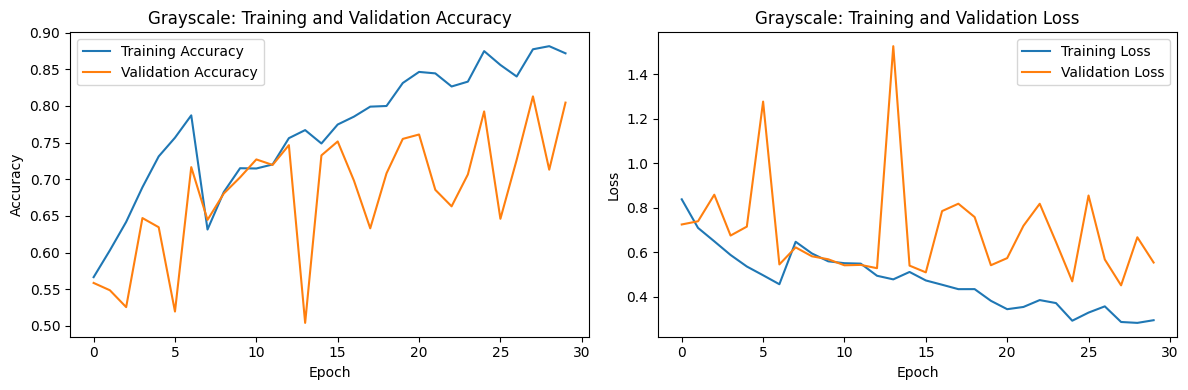

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


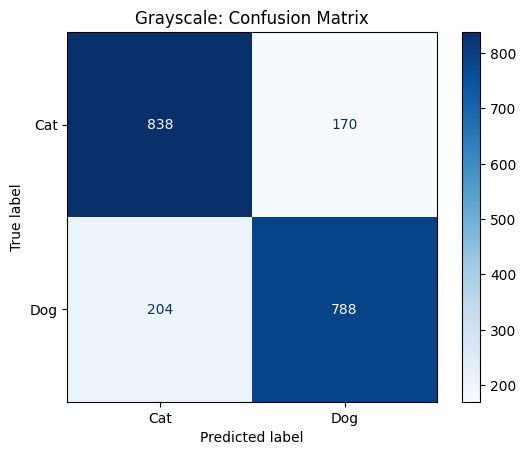

Accuracy: 0.8130
Precision: 0.8225
Recall: 0.7944
F1 Score: 0.8082


In [ ]:
# 2. Grayscale Model
print("\nPreparing grayscale images...")
X_gray = preprocess_grayscale(train_images, img_dim)
X_train_gray, X_val_gray, y_train_split, y_val_split = train_test_split(
    X_gray, y_train, test_size=0.2, random_state=RANDOM_SEED)
model_results['Grayscale'] = train_and_evaluate_model(
    X_train_gray, X_val_gray, y_train_split, y_val_split, "Grayscale")


Preparing blurred images...


100%|██████████| 10000/10000 [00:03<00:00, 2995.08it/s]




===== Training Gaussian Blur Model =====
Input shape: (150, 150, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 150, 150, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 150, 150, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 75, 75, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 37, 37, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 18, 18, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 18, 18, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 10368)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       5,308,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 512)                 │              

 Total params: 5,553,153 (21.18 MB)

 Trainable params: 5,551,425 (21.18 MB)

 Non-trainable params: 1,728 (6.75 KB)

Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.5482 - loss: 1.0279 - val_accuracy: 0.5375 - val_loss: 0.8747
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5955 - loss: 0.7121 - val_accuracy: 0.6255 - val_loss: 0.6426
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6512 - loss: 0.6450 - val_accuracy: 0.5280 - val_loss: 0.7459
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6858 - loss: 0.5936 - val_accuracy: 0.6520 - val_loss: 0.6727
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7258 - loss: 0.5399 - val_accuracy: 0.7015 - val_loss: 0.5694
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7584 - loss: 0.4920 - val_accuracy: 0.6955 - val_loss: 0.5936
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7819 - loss: 0.4504 - val_accuracy: 0.7685 - val_loss: 0.5053
Epoch 8/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8071 - loss: 0.4211 - val_accuracy: 

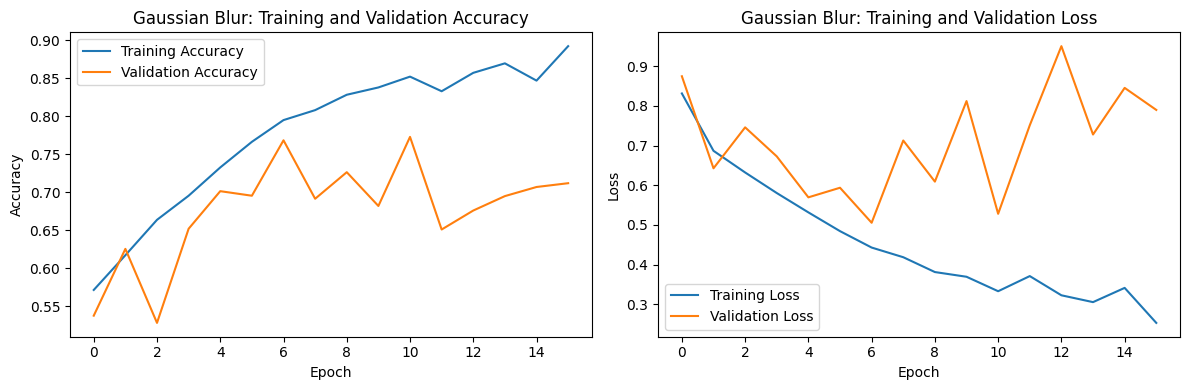

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


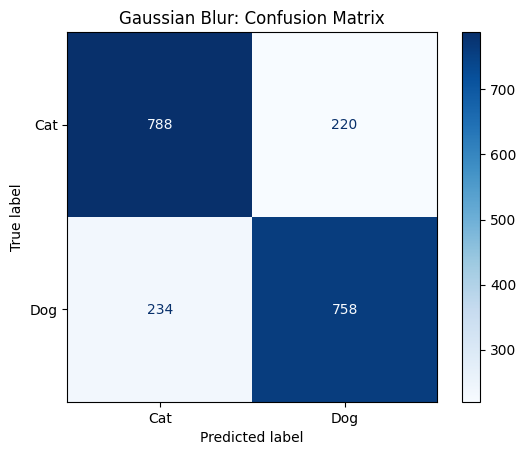

Accuracy: 0.7730
Precision: 0.7751
Recall: 0.7641
F1 Score: 0.7695


In [ ]:
# 3. Gaussian Blur Model
print("\nPreparing blurred images...")
X_blur = preprocess_blur(train_images, img_dim)
X_train_blur, X_val_blur, y_train_split, y_val_split = train_test_split(
    X_blur, y_train, test_size=0.2, random_state=RANDOM_SEED)
model_results['Gaussian Blur'] = train_and_evaluate_model(
    X_train_blur, X_val_blur, y_train_split, y_val_split, "Gaussian Blur")


Preparing edge images...


100%|██████████| 10000/10000 [00:04<00:00, 2447.44it/s]




===== Training Canny Edge Model =====
Input shape: (150, 150, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 150, 150, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 75, 75, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 87616)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │      22,429,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,468,801 (85.71 MB)

 Trainable params: 22,468,289 (85.71 MB)

 Non-trainable params: 512 (2.00 KB)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.5954 - loss: 0.8183 - val_accuracy: 0.6455 - val_loss: 0.6649
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7260 - loss: 0.6178 - val_accuracy: 0.5650 - val_loss: 0.8698
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7986 - loss: 0.4843 - val_accuracy: 0.6315 - val_loss: 0.7993
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8600 - loss: 0.3764 - val_accuracy: 0.6225 - val_loss: 0.9717
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8989 - loss: 0.2974 - val_accuracy: 0.6440 - val_loss: 0.9955
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9254 - loss: 0.2380 - val_accuracy: 0.6585 - val_loss: 0.9943
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9390 - loss: 0.2146 - val_accuracy: 0.6945 - val_loss: 0.8415
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9532 - loss: 0.1878 - val_accuracy: 0

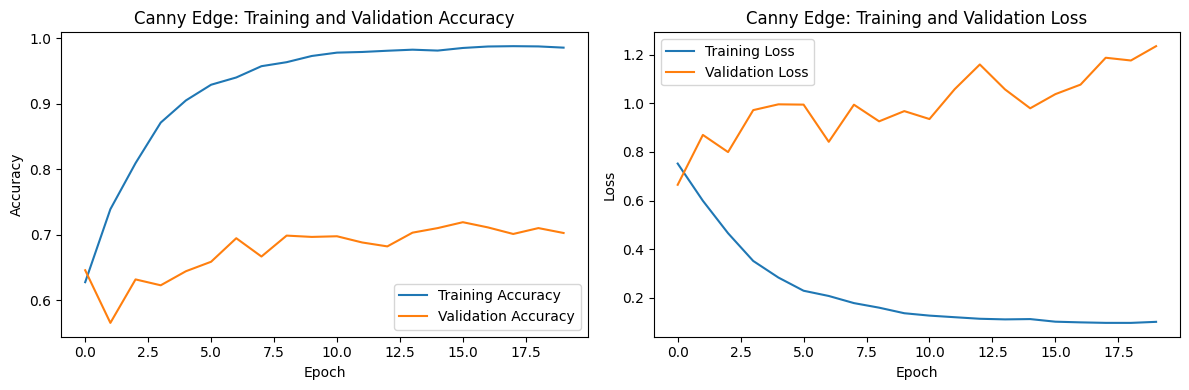

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


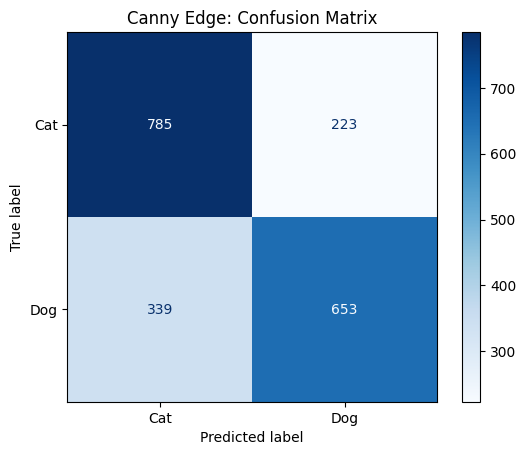

Accuracy: 0.7190
Precision: 0.7454
Recall: 0.6583
F1 Score: 0.6991


In [ ]:

# 4. Canny Edge Model
print("\nPreparing edge images...")
X_edge = preprocess_edge(train_images, img_dim)
X_train_edge, X_val_edge, y_train_split, y_val_split = train_test_split(
    X_edge, y_train, test_size=0.2, random_state=RANDOM_SEED)
model_results['Canny Edge'] = train_and_evaluate_model(
    X_train_edge, X_val_edge, y_train_split, y_val_split, "Canny Edge")


Preparing HOG images...


100%|██████████| 10000/10000 [03:12<00:00, 51.83it/s]




===== Training HOG Model =====
Input shape: (150, 150, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 150, 150, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 75, 75, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 87616)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │      22,429,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,468,801 (85.71 MB)

 Trainable params: 22,468,289 (85.71 MB)

 Non-trainable params: 512 (2.00 KB)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.6463 - loss: 0.7070 - val_accuracy: 0.7135 - val_loss: 0.7068
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7274 - loss: 0.5851 - val_accuracy: 0.6885 - val_loss: 0.6429
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7385 - loss: 0.5607 - val_accuracy: 0.6375 - val_loss: 0.6712
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7544 - loss: 0.5378 - val_accuracy: 0.6245 - val_loss: 0.7101
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7642 - loss: 0.5219 - val_accuracy: 0.6715 - val_loss: 0.6580
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7720 - loss: 0.5059 - val_accuracy: 0.6475 - val_loss: 0.7135
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7244 - loss: 0.7048

Validation Loss: 0.7068
Validation Accuracy: 0.7135


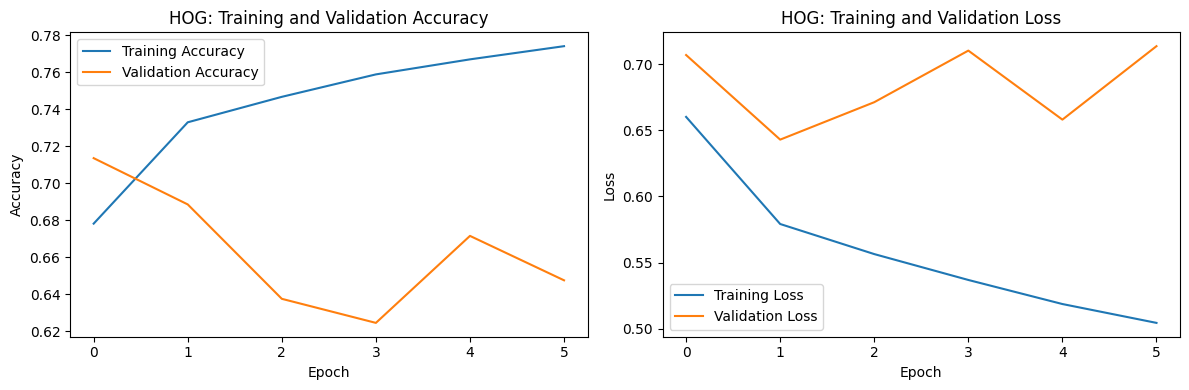

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


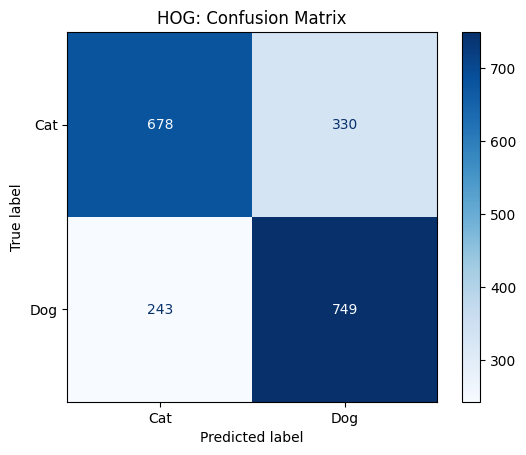

Accuracy: 0.7135
Precision: 0.6942
Recall: 0.7550
F1 Score: 0.7233


In [ ]:

# 5. HOG Model
print("\nPreparing HOG images...")
X_hog = preprocess_hog(train_images, img_dim)
X_train_hog, X_val_hog, y_train_split, y_val_split = train_test_split(
    X_hog, y_train, test_size=0.2, random_state=RANDOM_SEED)
model_results['HOG'] = train_and_evaluate_model(
    X_train_hog, X_val_hog, y_train_split, y_val_split, "HOG")


Preparing combined images...


100%|██████████| 10000/10000 [00:04<00:00, 2050.68it/s]




===== Training Combined Model =====
Input shape: (150, 150, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 150, 150, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 150, 150, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 75, 75, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 37, 37, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 18, 18, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 18, 18, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 10368)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       5,308,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 512)                 │              

 Total params: 5,553,153 (21.18 MB)

 Trainable params: 5,551,425 (21.18 MB)

 Non-trainable params: 1,728 (6.75 KB)

Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.5755 - loss: 0.9668 - val_accuracy: 0.4880 - val_loss: 0.7177
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6329 - loss: 0.6891 - val_accuracy: 0.5130 - val_loss: 0.9393
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6622 - loss: 0.6332 - val_accuracy: 0.7080 - val_loss: 0.5738
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6699 - loss: 0.6174 - val_accuracy: 0.6735 - val_loss: 0.6131
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7223 - loss: 0.5550 - val_accuracy: 0.5965 - val_loss: 0.7657
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7388 - loss: 0.5381 - val_accuracy: 0.6070 - val_loss: 0.8164
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7628 - loss: 0.4948 - val_accuracy: 0.6425 - val_loss: 0.7209
Epoch 8/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7601 - loss: 0.4911 - val_accuracy: 

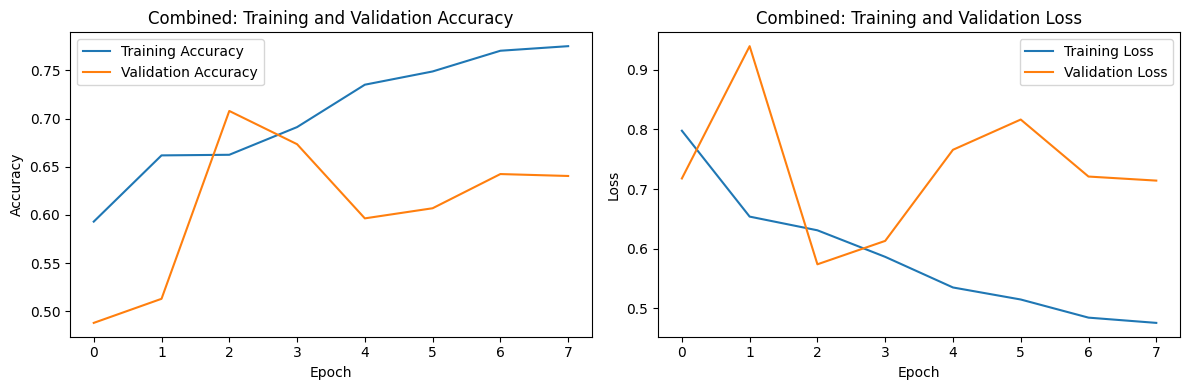

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


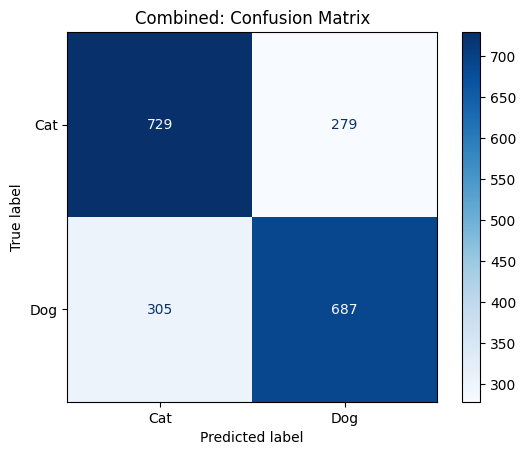

Accuracy: 0.7080
Precision: 0.7112
Recall: 0.6925
F1 Score: 0.7017


In [ ]:


# 6. Combined Model
print("\nPreparing combined images...")
X_combined = preprocess_combined(train_images, img_dim)
X_train_combined, X_val_combined, y_train_split, y_val_split = train_test_split(
    X_combined, y_train, test_size=0.2, random_state=RANDOM_SEED)
model_results['Combined'] = train_and_evaluate_model(
    X_train_combined, X_val_combined, y_train_split, y_val_split, "Combined")



===== Model Comparison =====
           Model  Accuracy  Precision    Recall  F1 Score
0   Original RGB    0.7610   0.763320  0.751008  0.757114
1      Grayscale    0.8025   0.781338  0.835685  0.807599
2  Gaussian Blur    0.7910   0.787000  0.793347  0.790161
3     Canny Edge    0.7505   0.759201  0.727823  0.743181
4            HOG    0.7325   0.742827  0.704637  0.723228
5       Combined    0.7400   0.754860  0.704637  0.728884

Best model based on accuracy: Grayscale


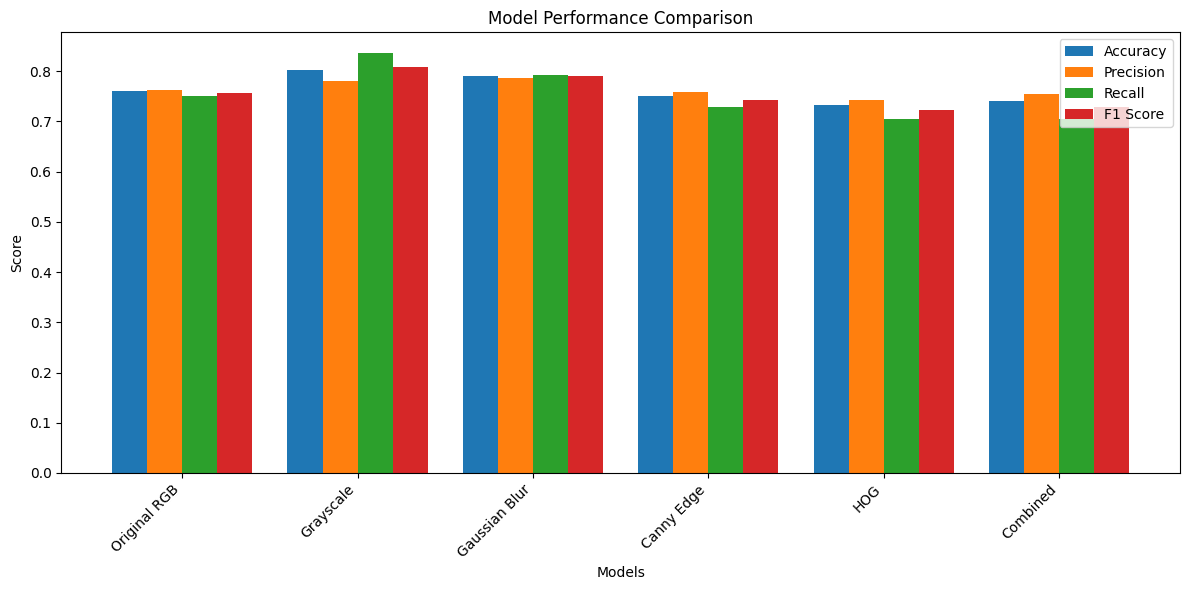



===== Generating Predictions Using the Best Model =====


100%|██████████| 1000/1000 [00:00<00:00, 9821.18it/s]


In [ ]:


# Compare model performances
print("\n\n===== Model Comparison =====")
models = list(model_results.keys())
accuracies = [model_results[model]['accuracy'] for model in models]
precisions = [model_results[model]['precision'] for model in models]
recalls = [model_results[model]['recall'] for model in models]
f1_scores = [model_results[model]['f1'] for model in models]

# Create comparison table
comparison_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})
print(comparison_df)

# Find the best model based on accuracy
best_model_idx = np.argmax(accuracies)
best_model_name = models[best_model_idx]
print(f"\nBest model based on accuracy: {best_model_name}")

# Plot comparison
plt.figure(figsize=(12, 6))
x = np.arange(len(models))
width = 0.2

plt.bar(x - 1.5*width, accuracies, width, label='Accuracy')
plt.bar(x - 0.5*width, precisions, width, label='Precision')
plt.bar(x + 0.5*width, recalls, width, label='Recall')
plt.bar(x + 1.5*width, f1_scores, width, label='F1 Score')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, models, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Select the best model for predictions on test data
print("\n\n===== Generating Predictions Using the Best Model =====")
best_model = model_results[best_model_name]['model']

# Prepare test data with the same preprocessing as the best model
if best_model_name == 'Original RGB':
    X_test_processed = preprocess_original(test_images, img_dim)
elif best_model_name == 'Grayscale':
    X_test_processed = preprocess_grayscale(test_images, img_dim)
elif best_model_name == 'Gaussian Blur':
    X_test_processed = preprocess_blur(test_images, img_dim)
elif best_model_name == 'Canny Edge':
    X_test_processed = preprocess_edge(test_images, img_dim)
elif best_model_name == 'HOG':
    X_test_processed = preprocess_hog(test_images, img_dim)
else:  # Combined
    X_test_processed = preprocess_combined(test_images, img_dim)


Making predictions on test data...
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Sample predictions:
   id prediction  confidence
0   1        dog    0.999211
1   2        cat    0.959634
2   3        cat    0.881851
3   4        cat    0.966808
4   5        dog    0.906213
5   6        dog    0.998722
6   7        dog    0.920408
7   8        cat    0.963091
8   9        dog    0.817576
9  10        dog    0.905640

Visualizing sample predictions:


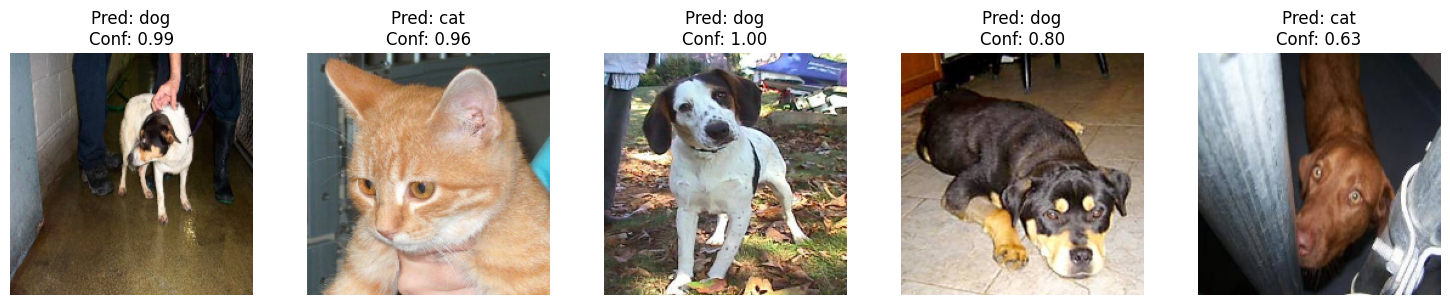


Predictions saved to /content/drive/MyDrive/Colab Notebooks/BCU/Applied AI/Image Processing Assessment/Prediction Challenge - Image Processing-20250218/data/test-predictions-cnn.csv

===== Complete =====


In [ ]:
# Make predictions on test data
print("\nMaking predictions on test data...")
test_predictions_prob = best_model.predict(X_test_processed)
test_predictions = (test_predictions_prob > 0.5).astype("int32")

# Convert numeric predictions back to labels
prediction_labels = ['cat' if pred == 0 else 'dog' for pred in test_predictions]

# Add predictions to test dataframe
df_test['prediction'] = prediction_labels
# df_test['confidence'] = np.where(test_predictions == 0, 1 - test_predictions_prob.flatten(), test_predictions_prob.flatten())
df_test['confidence'] = np.where(test_predictions == 0, 1 - test_predictions_prob, test_predictions_prob).flatten()

# Display sample predictions
print("\nSample predictions:")
print(df_test.head(10))

# Visualize some test predictions
def visualize_test_predictions(images, predictions, confidences, num_samples=5):
    indices = np.random.choice(len(images), num_samples, replace=False)

    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(indices):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(cv2.cvtColor(images[idx], cv2.COLOR_BGR2RGB))
        plt.title(f"Pred: {predictions[idx]}\nConf: {confidences[idx]:.2f}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

print("\nVisualizing sample predictions:")
visualize_test_predictions(test_images, prediction_labels, df_test['confidence'].values)

# Save predictions to CSV
output_path = os.path.join(data_folder, 'test-predictions-cnn.csv')
df_test.to_csv(output_path, index=False)
print(f"\nPredictions saved to {output_path}")

print("\n===== Complete =====")

In [ ]:
from tensorflow.keras import backend as K

# Clear session to free memory
keras.backend.clear_session()

# set random seed
# keras.utils.set_random_seed(seed) # set all random seeds for the program (Python, NumPy, and TensorFlow)